# <center> Motor Annual Insurance Claim ML Project</center>
<center>© Explore Data Science Academy</center>


---

## Problem Statement:
<div style="text-align: justify;">
This project seeks to optimize the prediction of motor insurance claims by evaluating and comparing various machine learning algorithms. The primary objective is to assess the performance and interpretability of these algorithms comprehensively. The analysis aims to identify the most effective algorithm for enhancing existing insurance claim prediction models in production. By achieving this, the project intends to not only improve the accuracy of claim predictions but also contribute to increased stakeholder confidence and more informed decision-making within the insurance industry.
</div>

<a id="cont"></a>
<a id="table-of-contents"></a>
## Table of Contents

<a href=#one>1. Importing Data Dependencies</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Preprocessing</a>

<a href=#five>5. Feature Engineering</a>

<a href=#six>6. Model and Model Evaluation</a>

<a id="one"></a>

# Importing Data Dependences

[Table of Contents](#table-of-contents)

In [1]:
import numpy as np
import pandas as pd
import re
import math
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import klib
sns.set_style('white')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>

# Loading the Data

[Back to Table of Contents](#table-of-contents)

In [3]:
pmd_train = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\EXPLORE\INTERNSHIP\ML PROJECT\internship-project-2301-05\data\data_files\PMD_train.csv')
pmd_test = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\EXPLORE\INTERNSHIP\ML PROJECT\internship-project-2301-05\data\data_files\PMD_test.csv')

In [4]:
import os
print(os.getcwd())

c:\Users\user\OneDrive\Desktop\EXPLORE\INTERNSHIP\ML PROJECT\internship-project-2301-05\notebooks


In [5]:
pd.set_option('display.max_columns', None)
df = pmd_train
df

,index,Occupation,IndustryType,Gender,MaritalStatus,Make,Model,Kilowatts,Transmission,Colour,VehicleType,BodyType,VehicleYear,PolicyMainDriverAnnualMileage,PolicyMainDriverLicenseDurationRange,PersonProvince,Area,SumAssured,TotalExcess,BaseExcess,PolicyHolderAgeYears,VehicleAgeYears,Exposure,AnnualClaims
0,2208,account management,office / clerical / manager,female,single,renault,captur,88,A,blue,Auto,X/O,2017,15000+ km,1 to 6 years,gauteng,meyerton,241200,43760.0,5000,31,2,1.000000,0.0
1,107576,junior civil engineer,other,female,single,toyota,yaris,79,A,white,Auto,H/B,2020,15000+ km,<1 Year,gauteng,germiston,272100,60775.0,13605,27,1,1.000000,0.0
2,91359,safety officer,mining,male,married,mini,cooper,90,A,white,Auto,H/B,2014,15000+ km,15+ years,north west,rustenburg,194800,32950.0,5000,48,6,1.000000,0.0
3,64679,concrete lab technician,other,male,married,opel,corsa,66,M,silver,Auto,H/B,2007,15000+ km,11 to 15 years,gauteng,boksburg,47700,20000.0,5000,30,13,0.838356,0.0
4,105904,visual manager,office / clerical / manager,male,married,volkswagen,jetta,118,M,brown,Auto,S/D,2013,5000 to 9999 km,15+ years,gauteng,roodepoort,168400,24840.0,3000,36,8,0.210959,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129460,66434,supervisor,mining,male,married,volkswagen,polo,55,M,white,Auto,H/B,2019,5000 to 9999 km,1 to 6 years,limpopo,phalaborwa,167900,9000.0,5000,34,1,0.309589,167900.0
129461,101055,other,other,male,single,volkswagen,polo,63,M,white,Auto,H/B,2017,15000+ km,6 to 11 years,gauteng,boordfontein,137100,25565.0,6855,30,4,0.183562,0.0
129462,86439,self employed,other,female,married,mercedes benz,c180,115,A,silver,Auto,S/D,2014,5000 to 9999 km,11 to 15 years,gauteng,eikenhof,228500,9000.0,5000,35,6,0.315068,0.0
129463,131820,police officer,professional,male,single,toyota,corolla,90,M,white,Auto,S/D,2017,5000 to 9999 km,1 to 6 years,eastern cape,other,171300,27130.0,5000,25,3,0.906849,0.0


#### Target Variable Info:

In [6]:
# Create a new column 'Claimed' with 0 for 0.0 values and 1 for >0.0 values
df['Claimed'] = df['AnnualClaims'].apply(lambda x: 0 if x == 0.0 else 1)


#### Countplot of AnnualClaims:

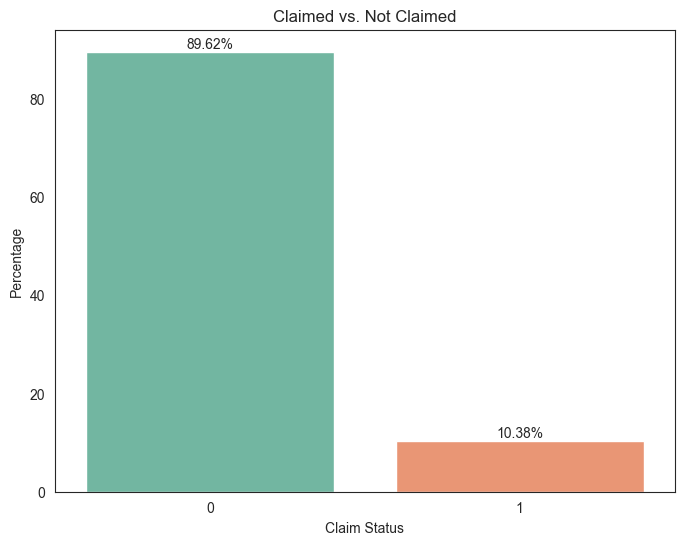

In [7]:
percentage_counts = df['Claimed'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=percentage_counts.index, y=percentage_counts.values, palette='Set2')
plt.title('Claimed vs. Not Claimed')
plt.xlabel('Claim Status')
plt.ylabel('Percentage')

# Annotate the percentages on the bars
for p, percentage in zip(ax.patches, percentage_counts.values):
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

**Insights:**


 89.62% of the dataset has not made a claim while 10.38% of the dataset has made a claim
 

<a id="three"></a>

# Exploratory Data Analysis

[Back to Table of Contents](#table-of-contents)

In [8]:
pd.set_option('display.max_columns', None)
df = pmd_train
df


,index,Occupation,IndustryType,Gender,MaritalStatus,Make,Model,Kilowatts,Transmission,Colour,VehicleType,BodyType,VehicleYear,PolicyMainDriverAnnualMileage,PolicyMainDriverLicenseDurationRange,PersonProvince,Area,SumAssured,TotalExcess,BaseExcess,PolicyHolderAgeYears,VehicleAgeYears,Exposure,AnnualClaims,Claimed
0,2208,account management,office / clerical / manager,female,single,renault,captur,88,A,blue,Auto,X/O,2017,15000+ km,1 to 6 years,gauteng,meyerton,241200,43760.0,5000,31,2,1.000000,0.0,0
1,107576,junior civil engineer,other,female,single,toyota,yaris,79,A,white,Auto,H/B,2020,15000+ km,<1 Year,gauteng,germiston,272100,60775.0,13605,27,1,1.000000,0.0,0
2,91359,safety officer,mining,male,married,mini,cooper,90,A,white,Auto,H/B,2014,15000+ km,15+ years,north west,rustenburg,194800,32950.0,5000,48,6,1.000000,0.0,0
3,64679,concrete lab technician,other,male,married,opel,corsa,66,M,silver,Auto,H/B,2007,15000+ km,11 to 15 years,gauteng,boksburg,47700,20000.0,5000,30,13,0.838356,0.0,0
4,105904,visual manager,office / clerical / manager,male,married,volkswagen,jetta,118,M,brown,Auto,S/D,2013,5000 to 9999 km,15+ years,gauteng,roodepoort,168400,24840.0,3000,36,8,0.210959,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129460,66434,supervisor,mining,male,married,volkswagen,polo,55,M,white,Auto,H/B,2019,5000 to 9999 km,1 to 6 years,limpopo,phalaborwa,167900,9000.0,5000,34,1,0.309589,167900.0,1
129461,101055,other,other,male,single,volkswagen,polo,63,M,white,Auto,H/B,2017,15000+ km,6 to 11 years,gauteng,boordfontein,137100,25565.0,6855,30,4,0.183562,0.0,0
129462,86439,self employed,other,female,married,mercedes benz,c180,115,A,silver,Auto,S/D,2014,5000 to 9999 km,11 to 15 years,gauteng,eikenhof,228500,9000.0,5000,35,6,0.315068,0.0,0
129463,131820,police officer,professional,male,single,toyota,corolla,90,M,white,Auto,S/D,2017,5000 to 9999 km,1 to 6 years,eastern cape,other,171300,27130.0,5000,25,3,0.906849,0.0,0


#### Summary Statistics:

In [9]:
#check for the descriptive statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,129465.0,97069.925741,56159.662177,0.0,48416.000000,97127.0,145805.0,193841.0
Kilowatts,129465.0,84.202819,31.655294,0.0,63.000000,74.0,97.0,426.0
VehicleYear,129465.0,2014.476414,3.653251,2004.0,2012.000000,2015.0,2017.0,2022.0
SumAssured,129465.0,157700.526397,72162.021462,30000.0,109100.000000,146700.0,189300.0,515000.0
TotalExcess,129465.0,24369.043502,12218.025355,0.0,19000.000000,25130.0,31770.0,90460.0
BaseExcess,129465.0,4480.361812,1980.984924,0.0,4000.000000,5000.0,5000.0,60000.0
PolicyHolderAgeYears,129465.0,38.158792,10.118095,18.0,30.000000,36.0,44.0,92.0
VehicleAgeYears,129465.0,5.599622,3.635835,0.0,3.000000,5.0,8.0,16.0
Exposure,129465.0,0.755729,0.319860,0.1,0.421918,1.0,1.0,1.0
AnnualClaims,129465.0,4309.076033,22902.575946,0.0,0.000000,0.0,0.0,475900.0


**Insights from the Data:**

1. **Age of Vehicles:** Policy holders with older vehicles tend to have higher annual claims.

2. **Sum Assured:** Policy holders with higher sum assured tend to have higher total excess.

3. **Exposure:** Policy holders with higher exposure tend to have higher annual claims.


In [10]:
#check for the data types in the data
df.dtypes

index                                     int64
Occupation                               object
IndustryType                             object
Gender                                   object
MaritalStatus                            object
Make                                     object
Model                                    object
Kilowatts                                 int64
Transmission                             object
Colour                                   object
VehicleType                              object
BodyType                                 object
VehicleYear                               int64
PolicyMainDriverAnnualMileage            object
PolicyMainDriverLicenseDurationRange     object
PersonProvince                           object
Area                                     object
SumAssured                                int64
TotalExcess                             float64
BaseExcess                                int64
PolicyHolderAgeYears                    

In [11]:
print("Shape of the PMD train dataset:")
print(df.shape)

Shape of the PMD train dataset:
(129465, 25)


In [12]:
print("Missing values in the PMD train dataset:")
print(df.isnull().sum())

Missing values in the PMD train dataset:
index                                   0
Occupation                              2
IndustryType                            0
Gender                                  0
MaritalStatus                           0
Make                                    0
Model                                   0
Kilowatts                               0
Transmission                            0
Colour                                  0
VehicleType                             0
BodyType                                0
VehicleYear                             0
PolicyMainDriverAnnualMileage           0
PolicyMainDriverLicenseDurationRange    0
PersonProvince                          0
Area                                    6
SumAssured                              0
TotalExcess                             0
BaseExcess                              0
PolicyHolderAgeYears                    0
VehicleAgeYears                         0
Exposure                           

In [13]:
data_types = df.dtypes
print(data_types)

index                                     int64
Occupation                               object
IndustryType                             object
Gender                                   object
MaritalStatus                            object
Make                                     object
Model                                    object
Kilowatts                                 int64
Transmission                             object
Colour                                   object
VehicleType                              object
BodyType                                 object
VehicleYear                               int64
PolicyMainDriverAnnualMileage            object
PolicyMainDriverLicenseDurationRange     object
PersonProvince                           object
Area                                     object
SumAssured                                int64
TotalExcess                             float64
BaseExcess                                int64
PolicyHolderAgeYears                    

#### Catagorical Plots:

In [14]:
# Separate features into categorical and numerical
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical Features:")
print(categorical_features)

print("\nNumerical Features:")
print(numerical_features)

Categorical Features:
['Occupation', 'IndustryType', 'Gender', 'MaritalStatus', 'Make', 'Model', 'Transmission', 'Colour', 'VehicleType', 'BodyType', 'PolicyMainDriverAnnualMileage', 'PolicyMainDriverLicenseDurationRange', 'PersonProvince', 'Area']

Numerical Features:
['index', 'Kilowatts', 'VehicleYear', 'SumAssured', 'TotalExcess', 'BaseExcess', 'PolicyHolderAgeYears', 'VehicleAgeYears', 'Exposure', 'AnnualClaims', 'Claimed']


**Insights:**

There are 14 categorical features in the data set as shown above.
We will treat those features by using label encoding to change them into numerical feature before we continue to the model creation.

In [15]:
# Function to show distribution of claim status per category
def cat_plot(col, df, claimed_col='Claimed', top_n=10):
    top_categories = df[col].value_counts().head(top_n).index
    plt.figure(figsize=(14, 6))
    plt.title(f'Distribution of {col} by Claim Status')
    filtered_df = df[df[col].isin(top_categories)]
    total_counts = filtered_df[col].count()
    order = filtered_df[col].value_counts().index
    sns.countplot(data=filtered_df, x=col, hue=claimed_col, order=order)
    plt.xticks(rotation=45) 
    plt.xlabel(col)  
    plt.ylabel('Percentage') 
    ax = plt.gca()
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height/total_counts:.2%}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')  
    plt.legend(title=claimed_col)
    plt.show()




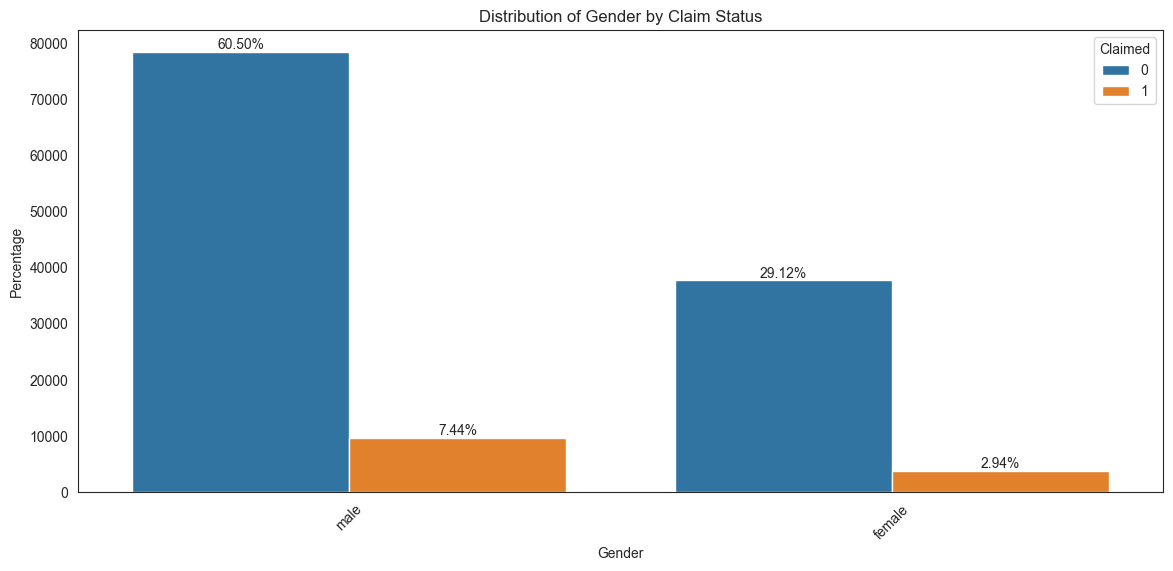

In [16]:
cat_plot('Gender', df)


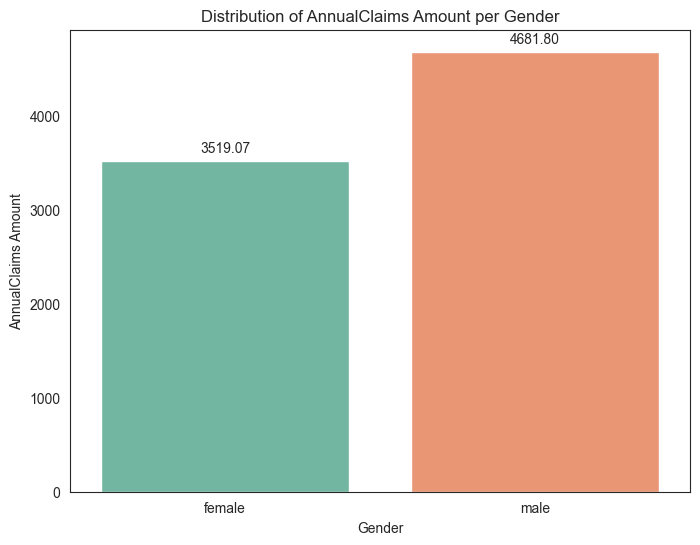

In [17]:
# Plot the distribution of AnnualClaims per Gender
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Gender', y='AnnualClaims', data=df, ci=None, palette='Set2')
plt.title('Distribution of AnnualClaims Amount per Gender')
plt.xlabel('Gender')
plt.ylabel('AnnualClaims Amount')

# Annotate the values on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()



**Insights**

Males are the majority in this dataset with a 7.44% that have claimed out of 60.50% males.

Females are only 29.12% in the datase with 2.94% that have claimed.

The total AnnualClaimed in gender is very high with  R4881.80 and a R3519.07 in females, this is a differnce of R1 362,73 higher to males.

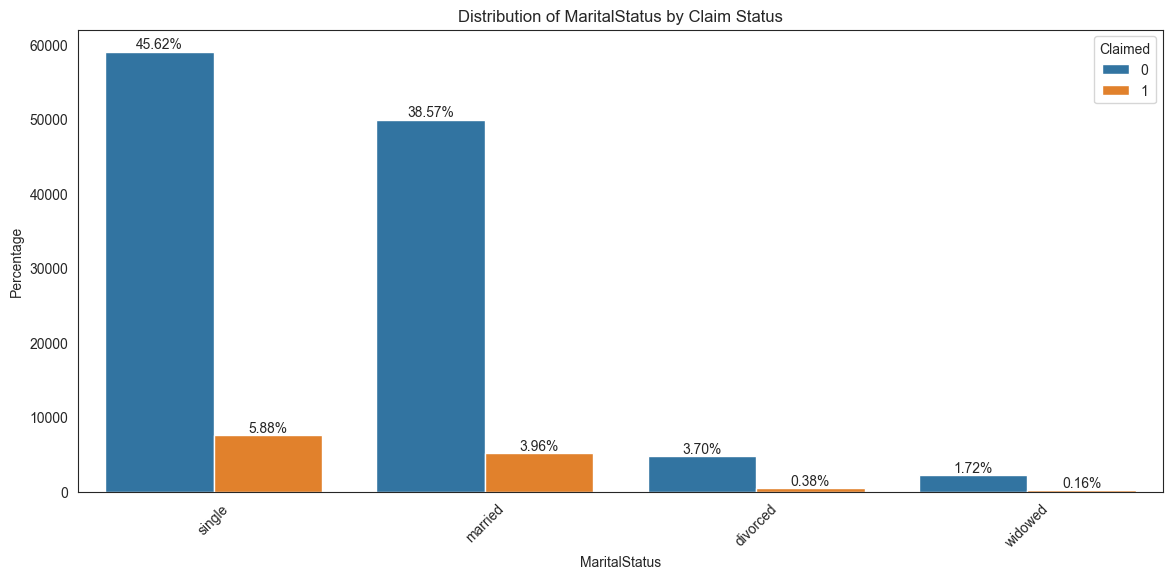

In [18]:
cat_plot('MaritalStatus', df, top_n=10)

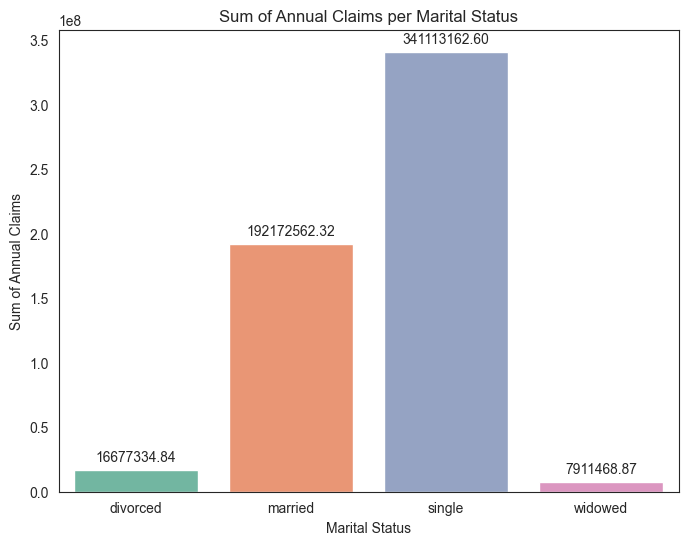

In [19]:
# Calculate the sum of AnnualClaims per MaritalStatus
sum_annual_claims_per_marital_status = df.groupby('MaritalStatus')['AnnualClaims'].sum().reset_index()

# Plot the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='MaritalStatus', y='AnnualClaims', data=sum_annual_claims_per_marital_status, palette='Set2')
plt.title('Sum of Annual Claims per Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Sum of Annual Claims')

# Annotate the values on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()



**Insights:**

The data is consisted of the single policy holders with 5.88% that claimed out of 45.62% in the dataset having an AnnualClaims amount higher than the rest followed by those that are married with the claim of 3.96% out of 38.57% in the dataset.

The lowest MaritalStatus is the widowed with 1.72% in the datatset and a 0.16% that have claimed and the lowest AnnualClaims value.

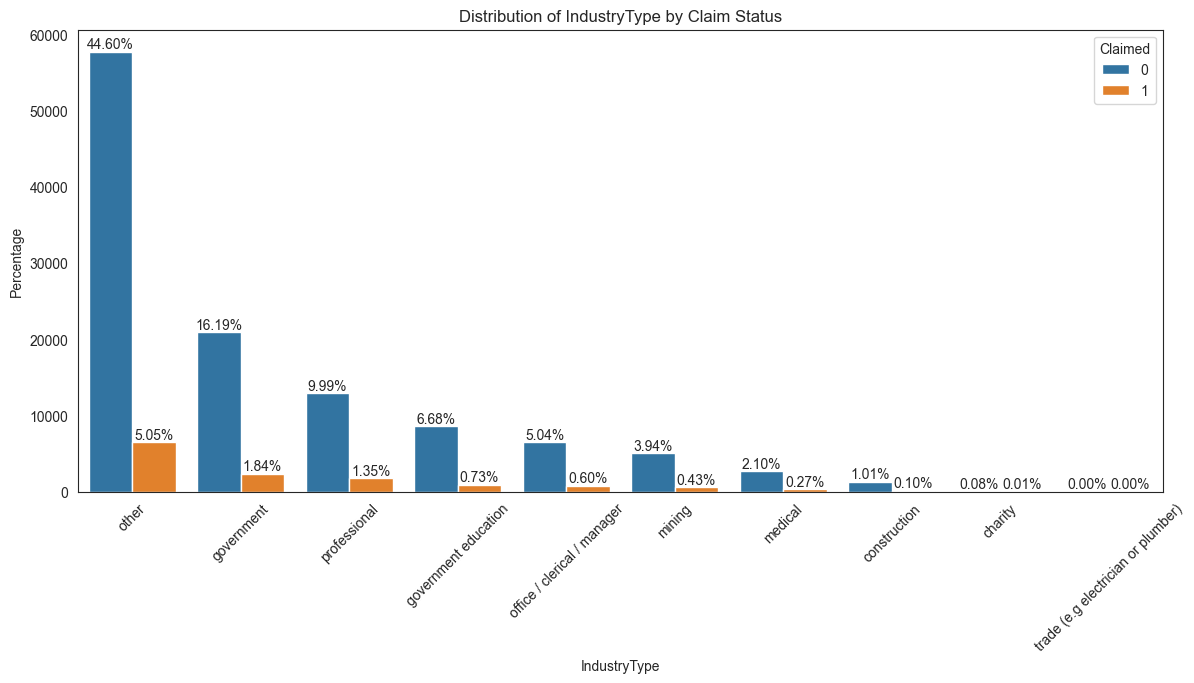

In [20]:
cat_plot('IndustryType', df, top_n=10)

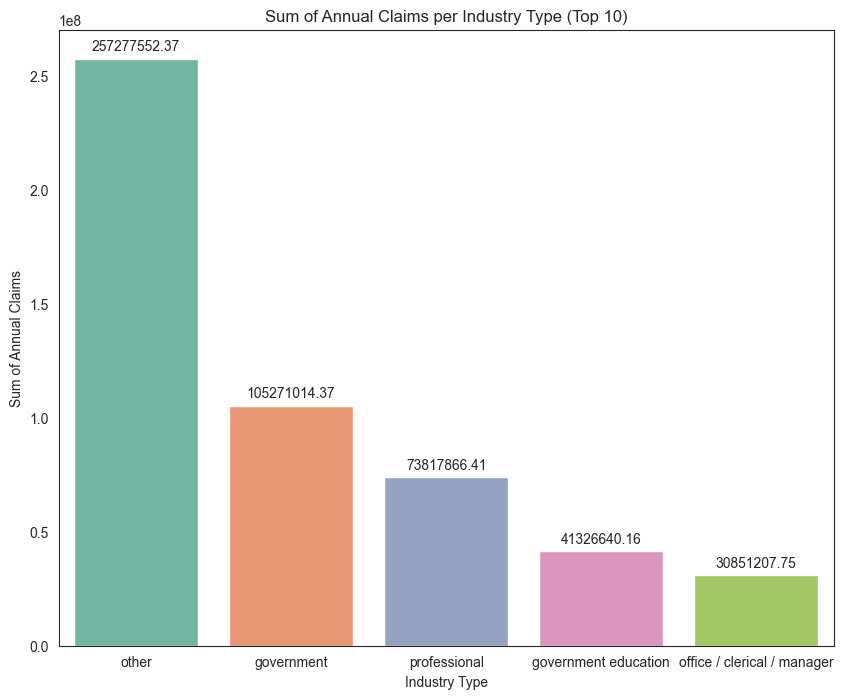

In [21]:
# Calculate the sum of AnnualClaims per IndustryType
sum_annual_claims_per_industry = df.groupby('IndustryType')['AnnualClaims'].sum().reset_index()
sum_annual_claims_per_industry = sum_annual_claims_per_industry.nlargest(5, 'AnnualClaims')

# Plot the bar plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='IndustryType', y='AnnualClaims', data=sum_annual_claims_per_industry, palette='Set2')
plt.title('Sum of Annual Claims per Industry Type (Top 10)')
plt.xlabel('Industry Type')
plt.ylabel('Sum of Annual Claims')

# Annotate the values on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()


**Insights:**

The industry with the highest claim is the orther with 5.05% claim  and has the highest capacity in the data with 44.60%, followed by the government industrytype with 1.84%. The industrutype that has no claims at all in the dataset are trade industrytpe.


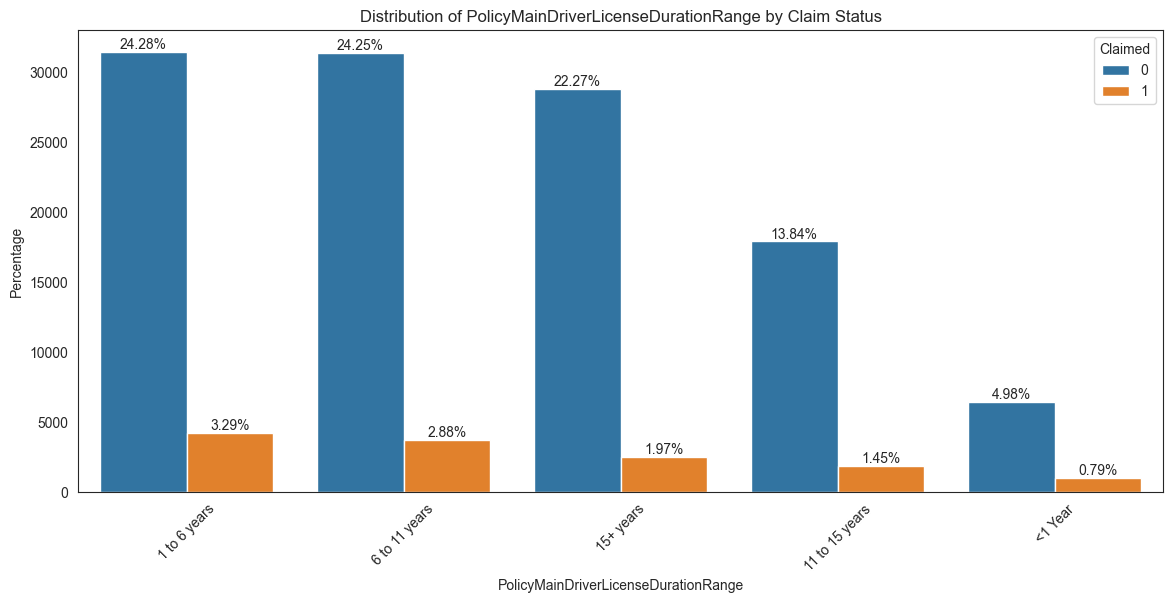

In [22]:
cat_plot('PolicyMainDriverLicenseDurationRange', df, top_n=10)

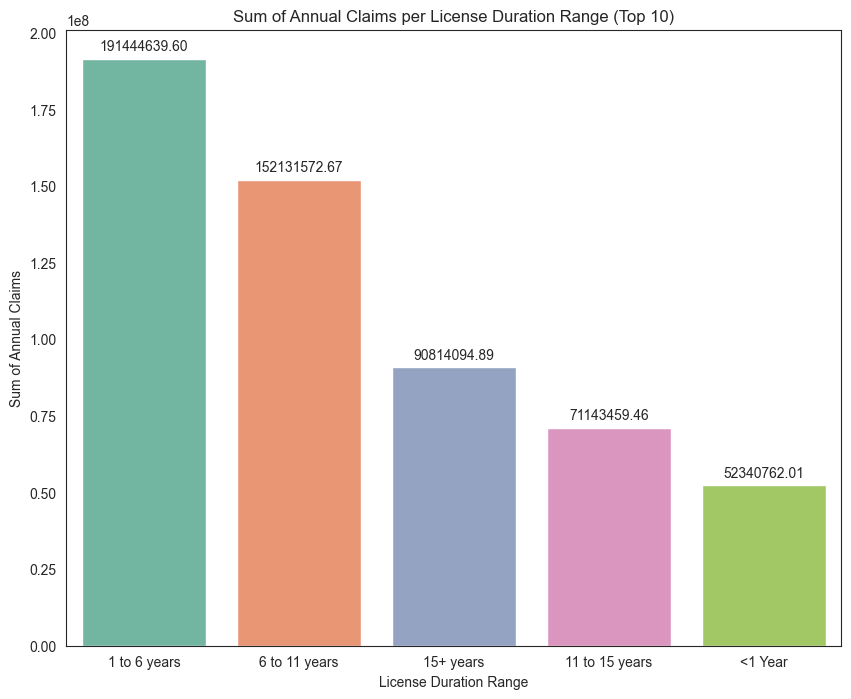

In [23]:
# Calculate the sum of AnnualClaims per PolicyMainDriverLicenseDurationRange
sum_annual_claims_per_license_duration = df.groupby('PolicyMainDriverLicenseDurationRange')['AnnualClaims'].sum().reset_index()
sum_annual_claims_per_license_duration = sum_annual_claims_per_license_duration.nlargest(10, 'AnnualClaims')

# Plot the bar plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='PolicyMainDriverLicenseDurationRange', y='AnnualClaims', data=sum_annual_claims_per_license_duration, palette='Set2')
plt.title('Sum of Annual Claims per License Duration Range (Top 10)')
plt.xlabel('License Duration Range')
plt.ylabel('Sum of Annual Claims')

# Annotate the values on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()


**Insights:**

The policy holder with the highest lisence duration tha have claimed are those between 1 to 6 years with 3.29% claim rate from 24.28% dataset in this duration range

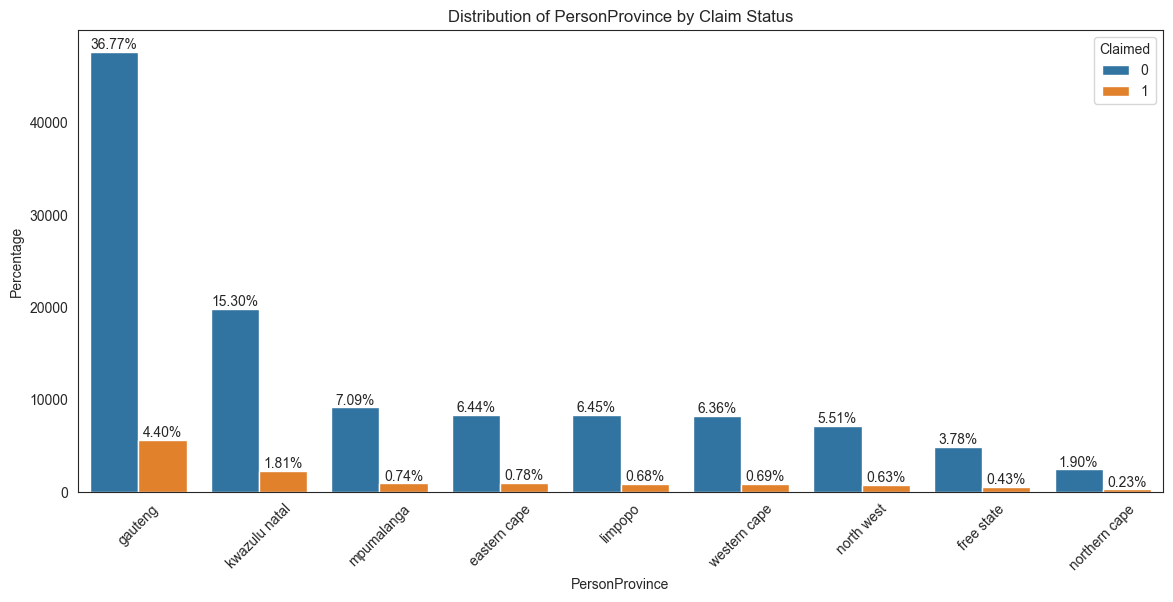

In [24]:
cat_plot('PersonProvince', df, top_n=10)

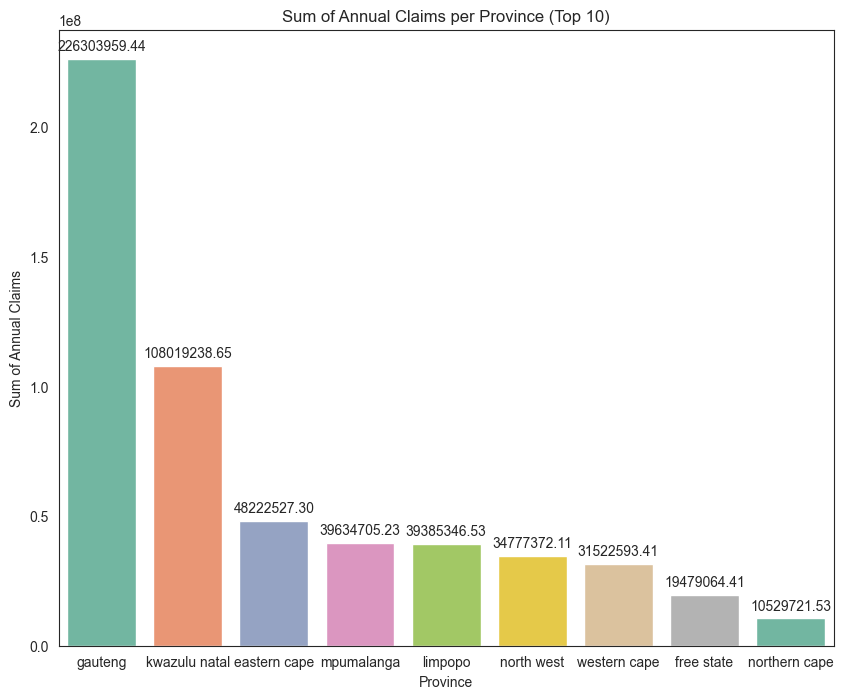

In [25]:
# Calculate the sum of AnnualClaims per PersonProvince
sum_annual_claims_per_province = df.groupby('PersonProvince')['AnnualClaims'].sum().reset_index()
sum_annual_claims_per_province = sum_annual_claims_per_province.nlargest(10, 'AnnualClaims')

# Plot the bar plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='PersonProvince', y='AnnualClaims', data=sum_annual_claims_per_province, palette='Set2')
plt.title('Sum of Annual Claims per Province (Top 10)')
plt.xlabel('Province')
plt.ylabel('Sum of Annual Claims')

# Annotate the values on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()


**Insights:**

THe highest province the dataset is the one with the highest claimed policies with 4.40% claim rate from a 36.77 capacity of the dataset

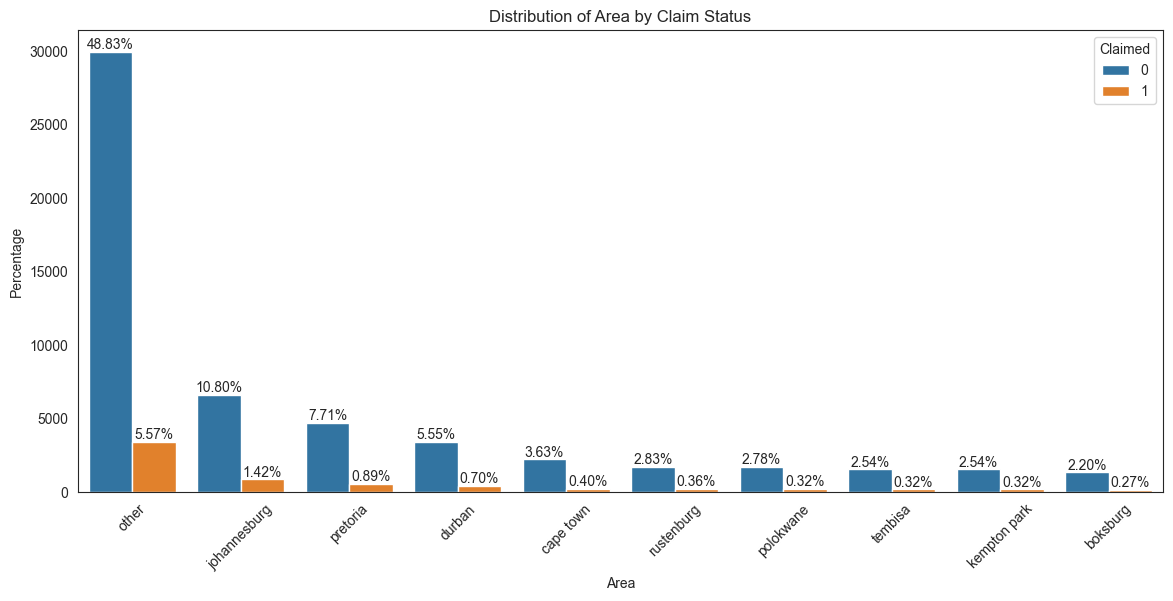

In [26]:
cat_plot('Area', df, top_n=10)

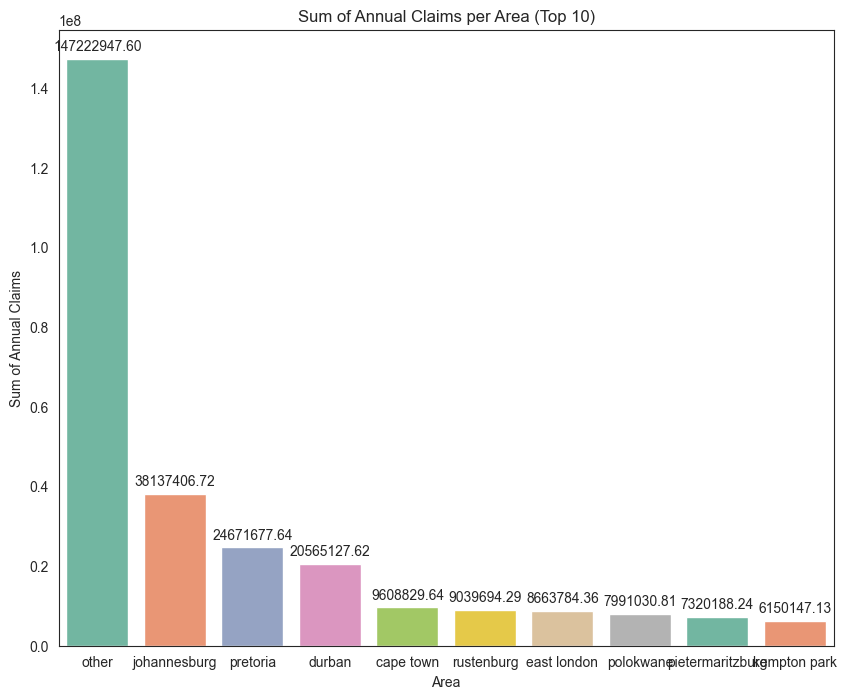

In [27]:
# Calculate the sum of AnnualClaims per Area
sum_annual_claims_per_area = df.groupby('Area')['AnnualClaims'].sum().reset_index()
sum_annual_claims_per_area = sum_annual_claims_per_area.nlargest(10, 'AnnualClaims')

# Plot the bar plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Area', y='AnnualClaims', data=sum_annual_claims_per_area, palette='Set2')
plt.title('Sum of Annual Claims per Area (Top 10)')
plt.xlabel('Area')
plt.ylabel('Sum of Annual Claims')

# Annotate the values on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()


**Insights:**

Highest are in the dataset is orther with 48.83% and claimed rate of 5.57%

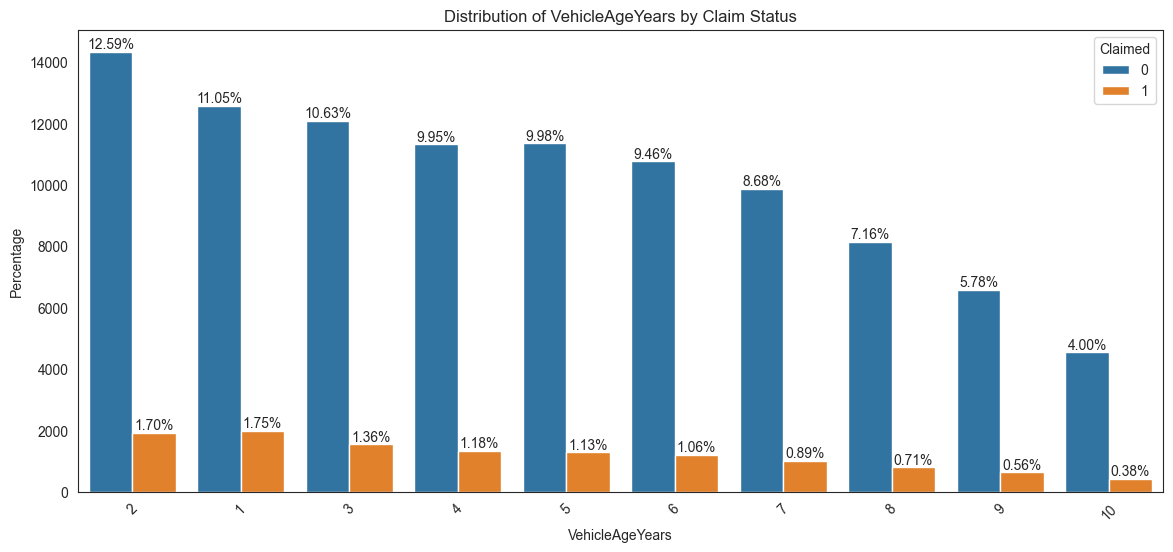

In [28]:
cat_plot('VehicleAgeYears', df, top_n=10)

**Insights:**

Vehicles aged 1 yeas have claimed more with the claim rate of 1.75%. It is also evident that the vehicles with 2 years are the highest in the dataset with 12.59%.

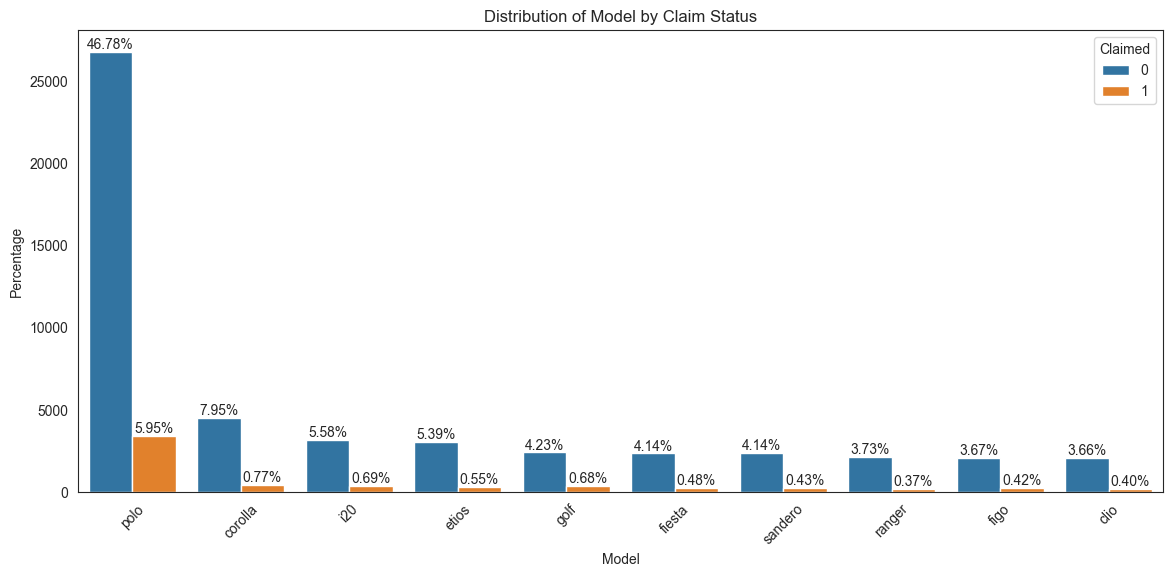

In [29]:
cat_plot('Model', df, top_n=10)

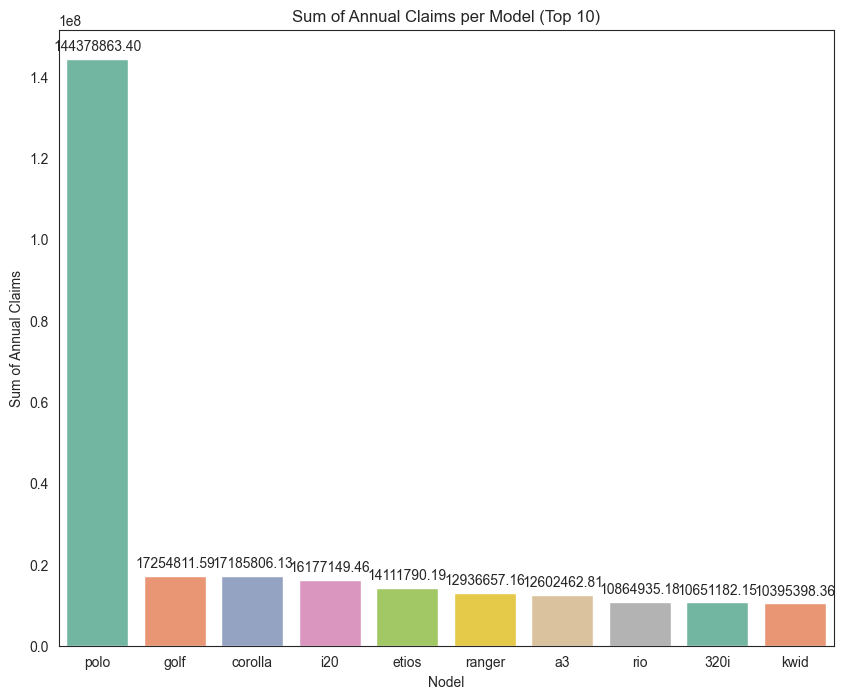

In [30]:
# Calculate the sum of AnnualClaims per polo
sum_annual_claims_per_polo = df.groupby('Model')['AnnualClaims'].sum().reset_index()
sum_annual_claims_per_polo = sum_annual_claims_per_polo.nlargest(10, 'AnnualClaims')

# Plot the bar plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Model', y='AnnualClaims', data=sum_annual_claims_per_polo, palette='Set2')
plt.title('Sum of Annual Claims per Model (Top 10)')
plt.xlabel('Nodel')
plt.ylabel('Sum of Annual Claims')

# Annotate the values on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()


**Insights:**

It can be noted that majority of the dataset is driving polo cars with the highest annual calims amount folowed by golf, with laso shows that the 1st 2 are VW cars.

#### Numerical Plots:

In [31]:
# Separate features into categorical and numerical
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical Features:")
print(categorical_features)

print("\nNumerical Features:")
print(numerical_features)

Categorical Features:
['Occupation', 'IndustryType', 'Gender', 'MaritalStatus', 'Make', 'Model', 'Transmission', 'Colour', 'VehicleType', 'BodyType', 'PolicyMainDriverAnnualMileage', 'PolicyMainDriverLicenseDurationRange', 'PersonProvince', 'Area']

Numerical Features:
['index', 'Kilowatts', 'VehicleYear', 'SumAssured', 'TotalExcess', 'BaseExcess', 'PolicyHolderAgeYears', 'VehicleAgeYears', 'Exposure', 'AnnualClaims', 'Claimed']


In [32]:
def num_plot(col, df, claimed_col='Claimed', bins=10, top_n=None):
    top_categories = df[col].value_counts().head(top_n).index if top_n else None
    plt.figure(figsize=(14, 6))
    filtered_df = df.copy()
    if top_categories is not None:
        filtered_df = df[df[col].isin(top_categories)]
    total_counts = filtered_df[col].count()
    order = filtered_df[col].value_counts().index
    sns.histplot(data=filtered_df, x=col, bins=bins, kde=True, hue=claimed_col, multiple='stack', palette='Set2')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    ax = plt.gca()
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height/total_counts:.2%}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')
    plt.title(f'Distribution of {col} by Claim Status')
    plt.legend(title=claimed_col)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


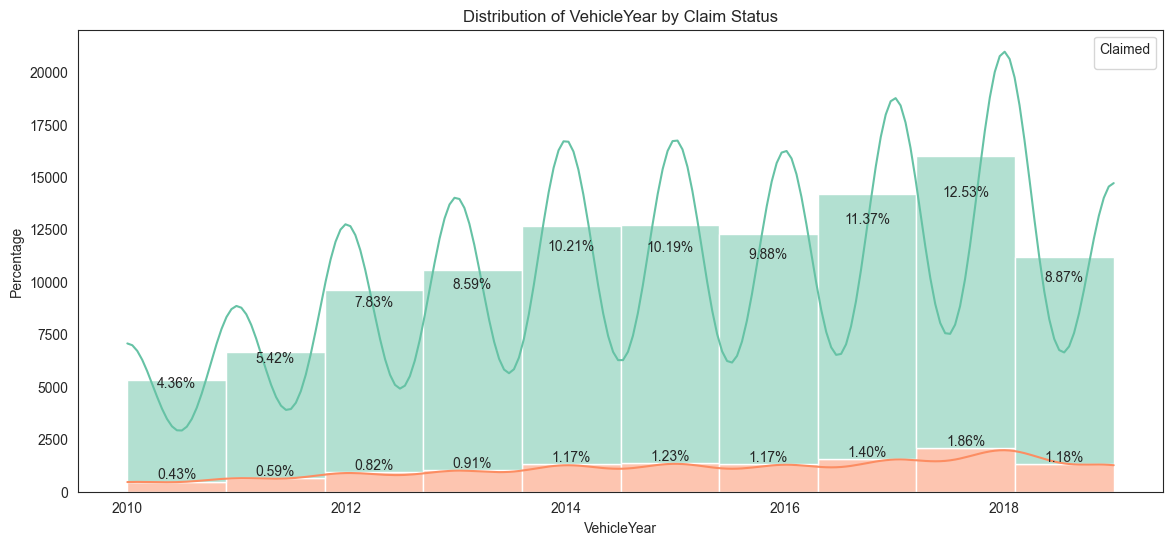

In [33]:
num_plot('VehicleYear', df, top_n=10)

**Insights:**

The vehicle year with hghest claim is year 2018 and it is also the highest vehicle year in the dataset with 12.53%

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


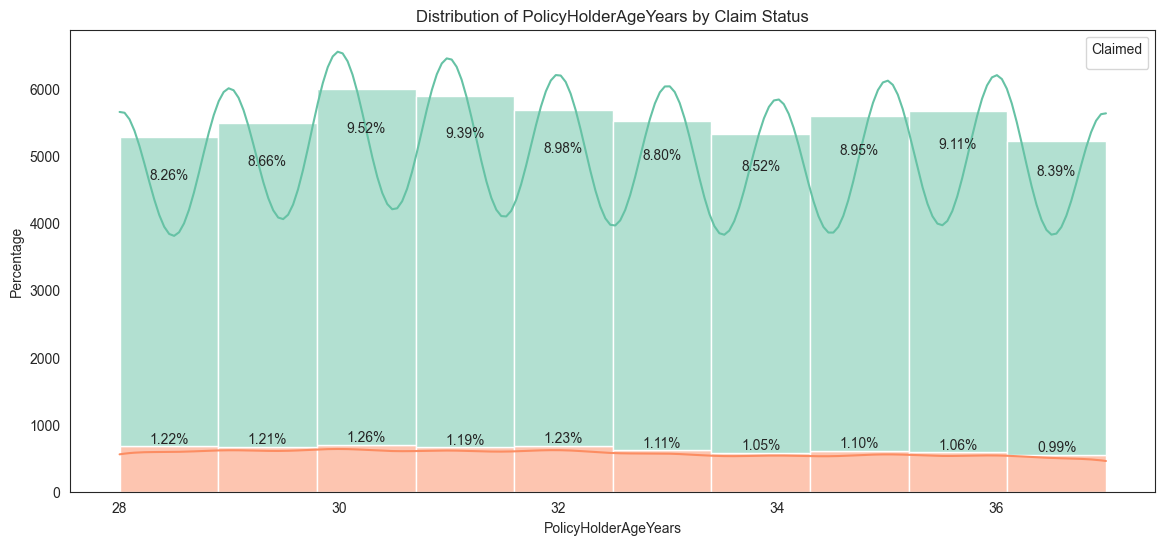

In [34]:
num_plot('PolicyHolderAgeYears', df, top_n=10)

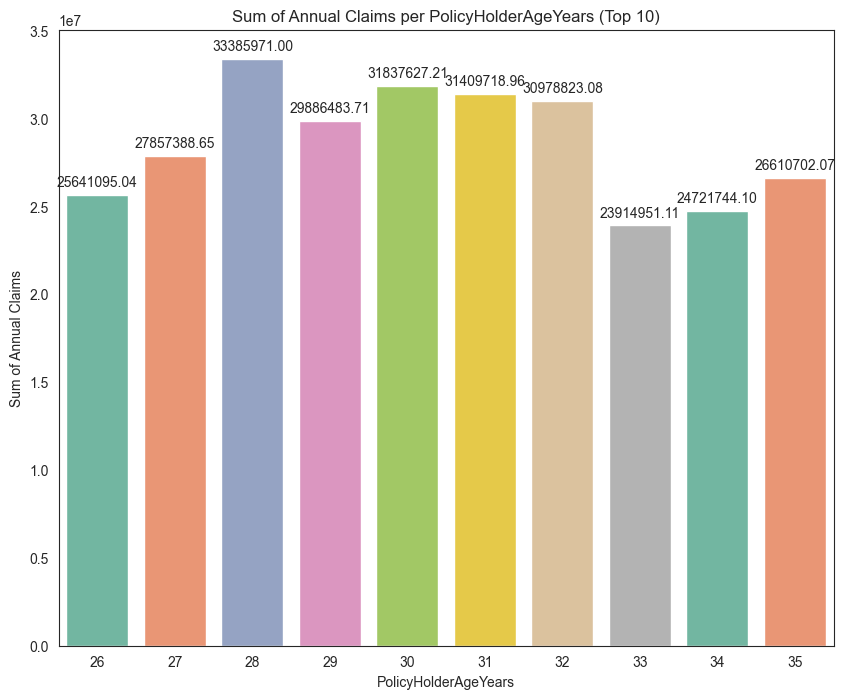

In [35]:
# Calculate the sum of AnnualClaims per PolicyHolderAgeYears
sum_annual_claims_per_age = df.groupby('PolicyHolderAgeYears')['AnnualClaims'].sum().reset_index()
sum_annual_claims_per_age = sum_annual_claims_per_age.nlargest(10, 'AnnualClaims')

# Plot the bar plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='PolicyHolderAgeYears', y='AnnualClaims', data=sum_annual_claims_per_age, palette='Set2')
plt.title('Sum of Annual Claims per PolicyHolderAgeYears (Top 10)')
plt.xlabel('PolicyHolderAgeYears')
plt.ylabel('Sum of Annual Claims')

# Annotate the values on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()


**Insights:**

Age 28 has the highest sum of AnnualClaims amount followed by policy holder with age 30 and 31

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


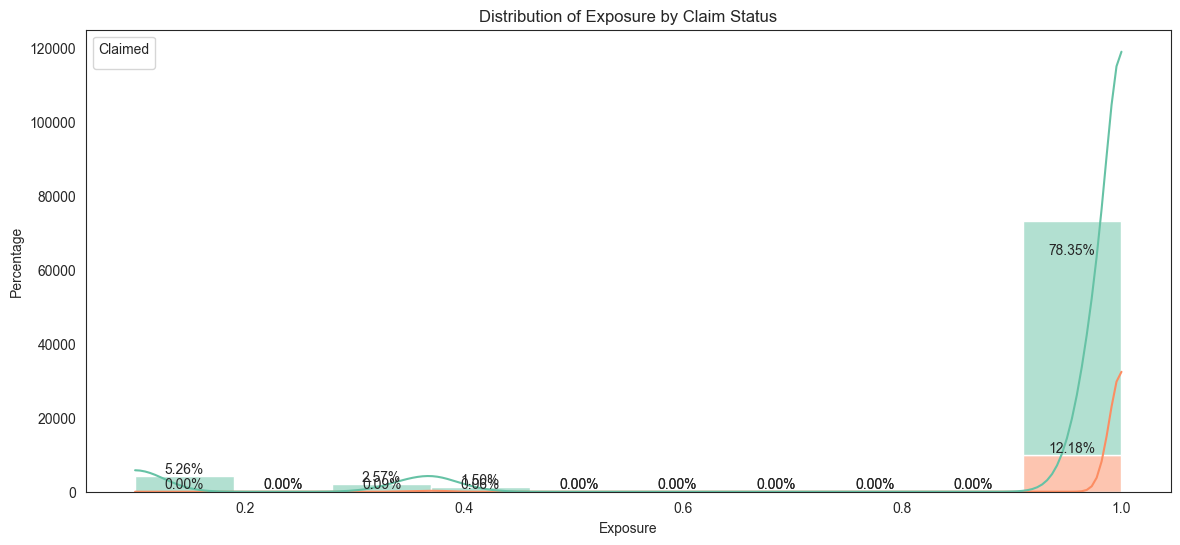

In [36]:
num_plot('Exposure', df, top_n=10)

#### Relationship Plots

#### Investigating Polo cars

In [37]:
def cat_plot(col, df, claimed_col='Claimed', top_n=10):
    top_categories = df[col].value_counts().head(top_n).index
    filtered_df = df[df[col].isin(top_categories)]
    plt.figure(figsize=(14, 6))
    plt.title(f'Top {top_n} {col} by Claimed')
    order = filtered_df[col].value_counts().index
    sns.countplot(data=filtered_df, x=col, hue=claimed_col, order=order)
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Percentage')
    total_counts = filtered_df[col].count()
    ax = plt.gca()
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_counts) * 100
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')
    plt.legend(title=claimed_col)
    plt.show()

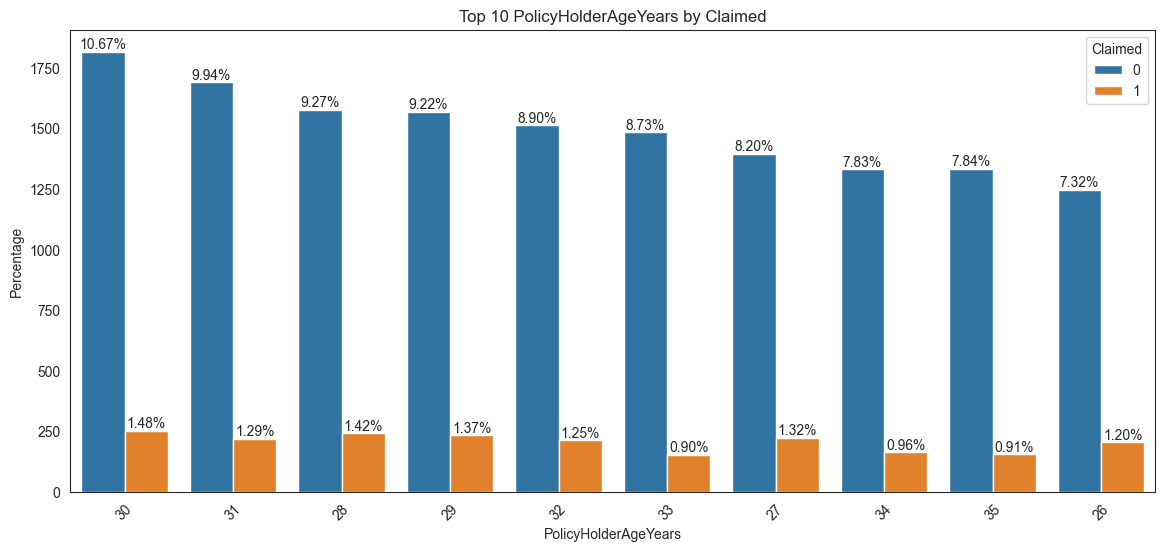

In [38]:

# df and the column 'Model' for car model information
cat_plot('PolicyHolderAgeYears', df[df['Model'] == 'polo'], top_n=10)  

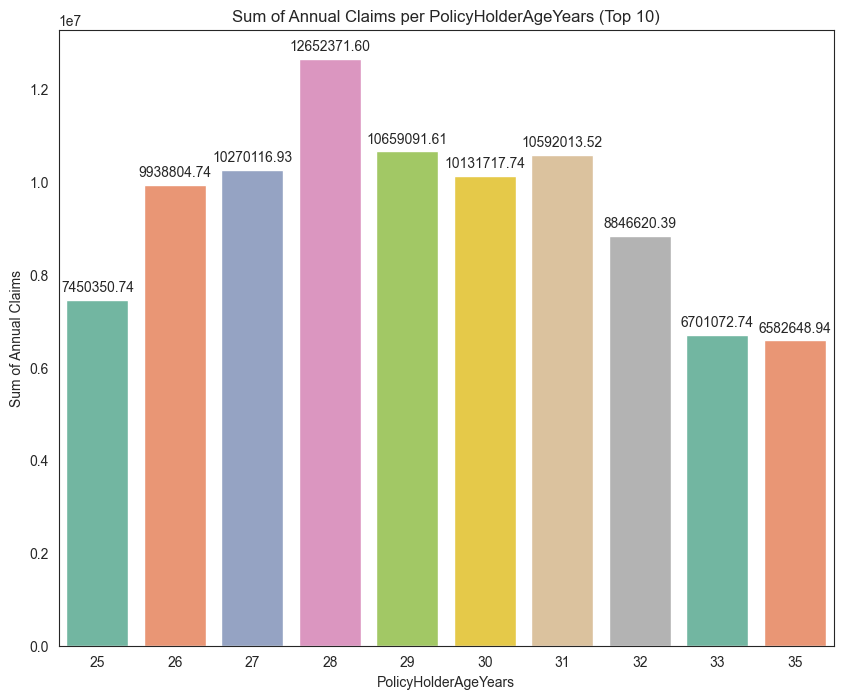

In [39]:

def cat_plot(column, data, top_n=10):
    sum_annual_claims = data.groupby(column)['AnnualClaims'].sum().reset_index()
    sum_annual_claims_top = sum_annual_claims.nlargest(top_n, 'AnnualClaims')

    # Plot the bar plot
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x=column, y='AnnualClaims', data=sum_annual_claims_top, palette='Set2')
    plt.title(f"Sum of Annual Claims per {column} (Top {top_n})")
    plt.xlabel(column)
    plt.ylabel('Sum of Annual Claims')

    # Annotate the values on the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

    plt.show()

# Calling the function
cat_plot('PolicyHolderAgeYears', df[df['Model'] == 'polo'], top_n=10)  


**Insights:**

It can be noted that the highest age to claim in the dataset is  the 30 years policy holders who are polo drivers out of 10.67% .

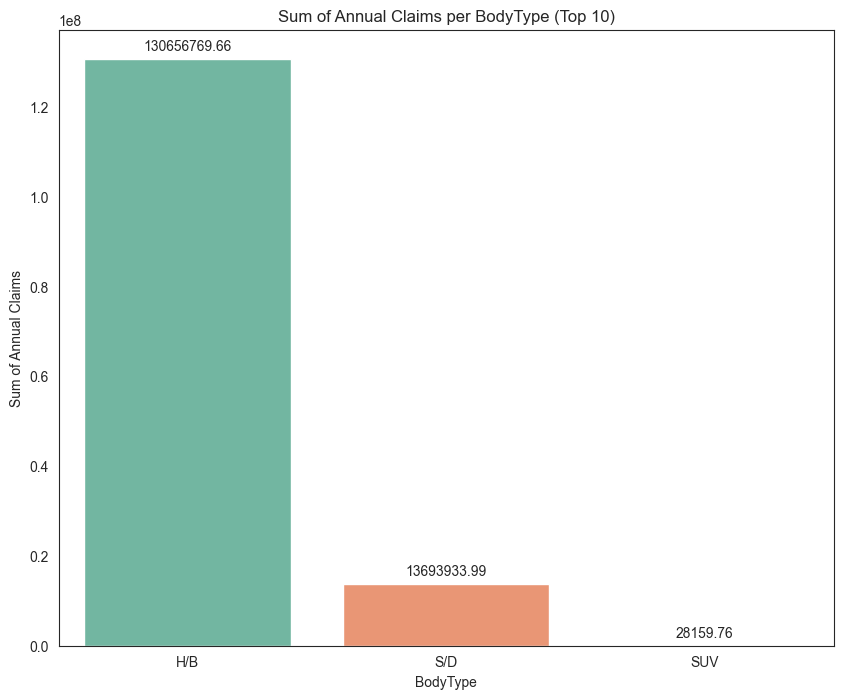

In [40]:
cat_plot('BodyType', df[df['Model'] == 'polo'], top_n=10)  

**Insights:**

The majority of the polo drivers are driving a H/B body type with a 10.14% that claimed out of the 79.19% in the datase.

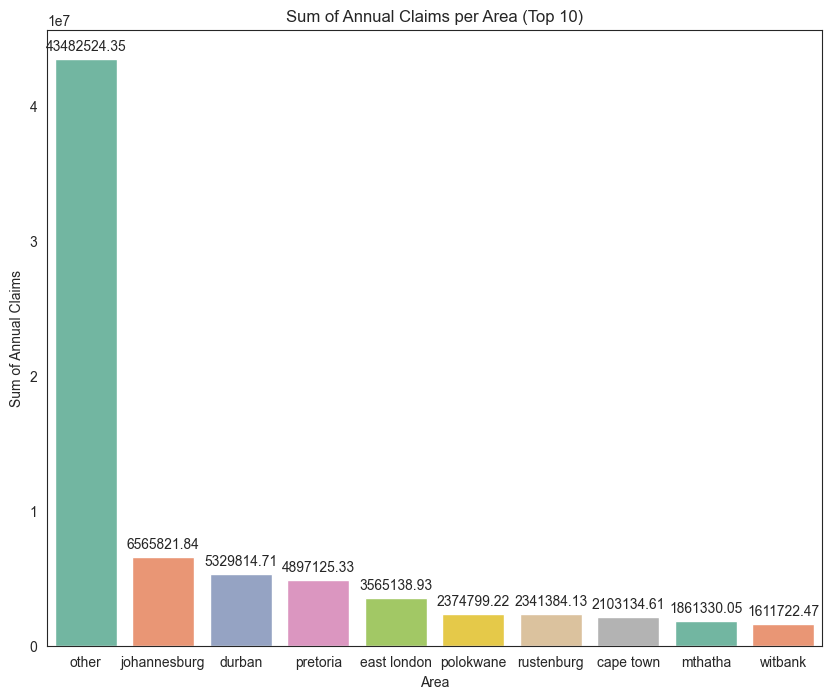

In [41]:
cat_plot('Area', df[df['Model'] == 'polo'], top_n=10)  

**Insights:**


It can be noted that the  "Area" with highest claimed polo vehicle is the orther area followe by Johannesburg

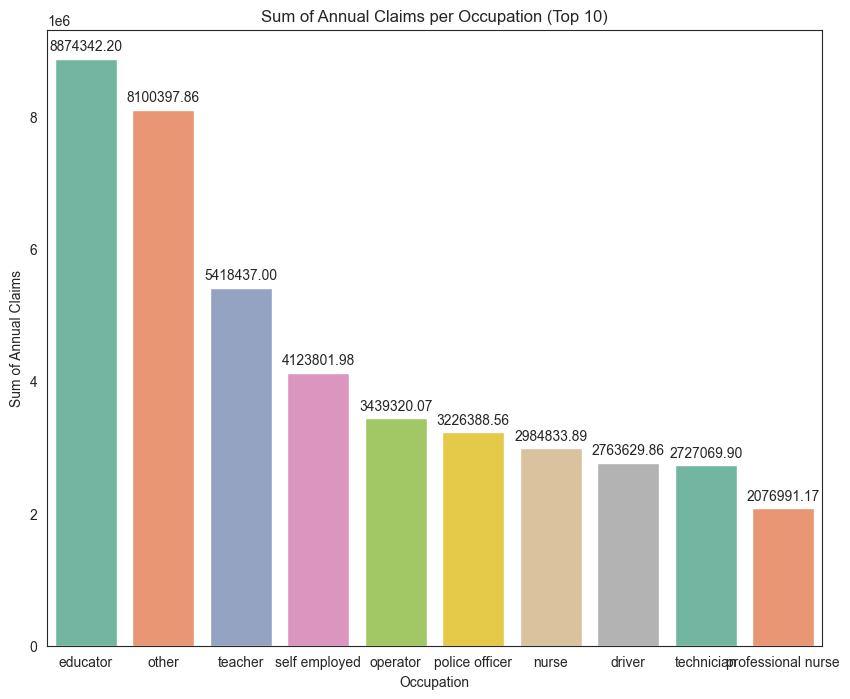

In [42]:
cat_plot('Occupation', df[df['Model'] == 'polo'], top_n=10)  

**Insights:**

It can be noted that the occupation that is dominated by polo drivers is orther followed by education

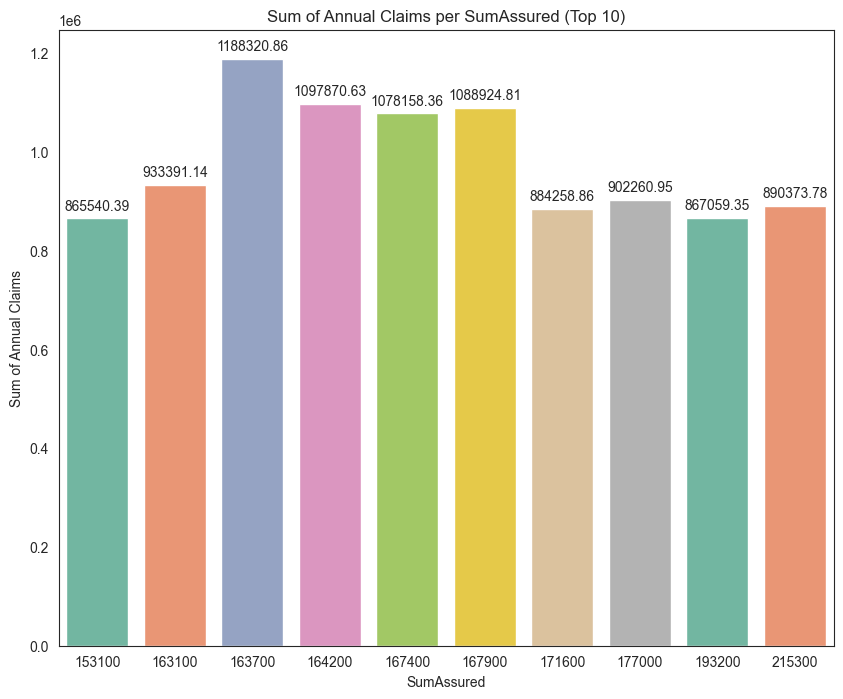

In [43]:
cat_plot('SumAssured', df[df['Model'] == 'polo'], top_n=10)  

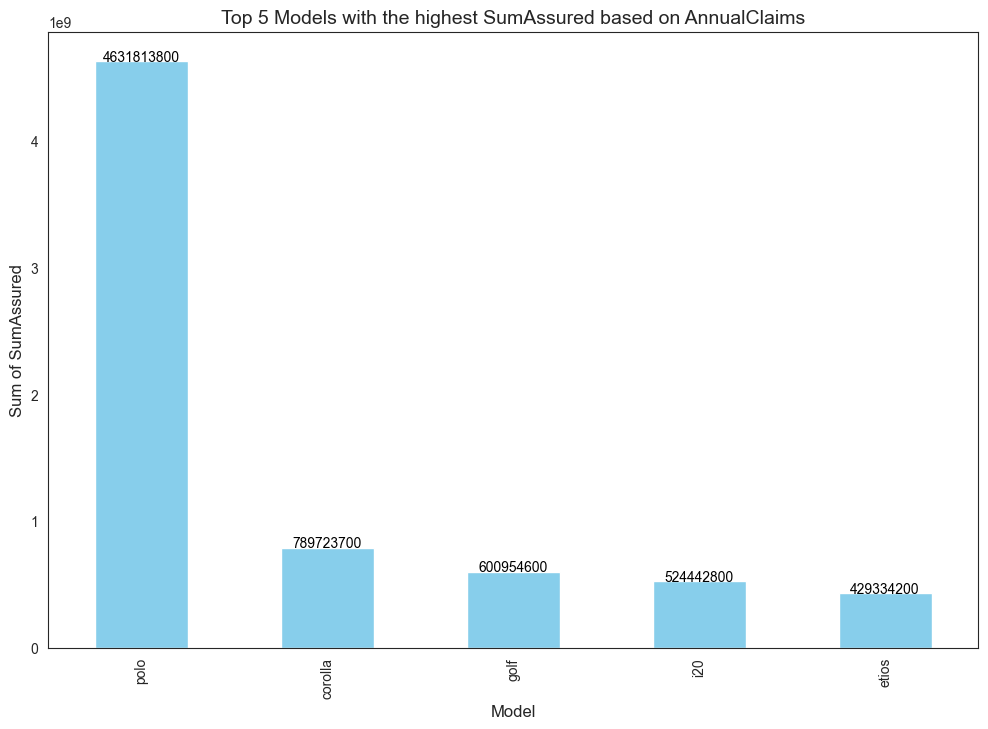

In [44]:
# Calculate the sum of SumAssured and AnnualClaims per Model
model_sums = df.groupby('Model').agg({'SumAssured': 'sum', 'AnnualClaims': 'sum'})

# Get the top 5 models based on AnnualClaims
top_5_models = model_sums.nlargest(5, 'AnnualClaims')

# Plotting the bar plot for the top 5 models
plt.figure(figsize=(12, 8))
ax = top_5_models['SumAssured'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Sum of SumAssured', fontsize=12)
plt.title('Top 5 Models with the highest SumAssured based on AnnualClaims', fontsize=14)

# Annotate the plot with the total sum for each model
for i, v in enumerate(top_5_models['SumAssured'].sort_values(ascending=False)):
    ax.text(i, v + 0.2, str(round(v, 2)), color='black', ha='center')

plt.show()




**Insights:**

It can be noted that the polo drivers also have the highest sum assure of 163700 with 1.93% that acctually claimed from the dataset of 11.42% in the 163700 catagory.

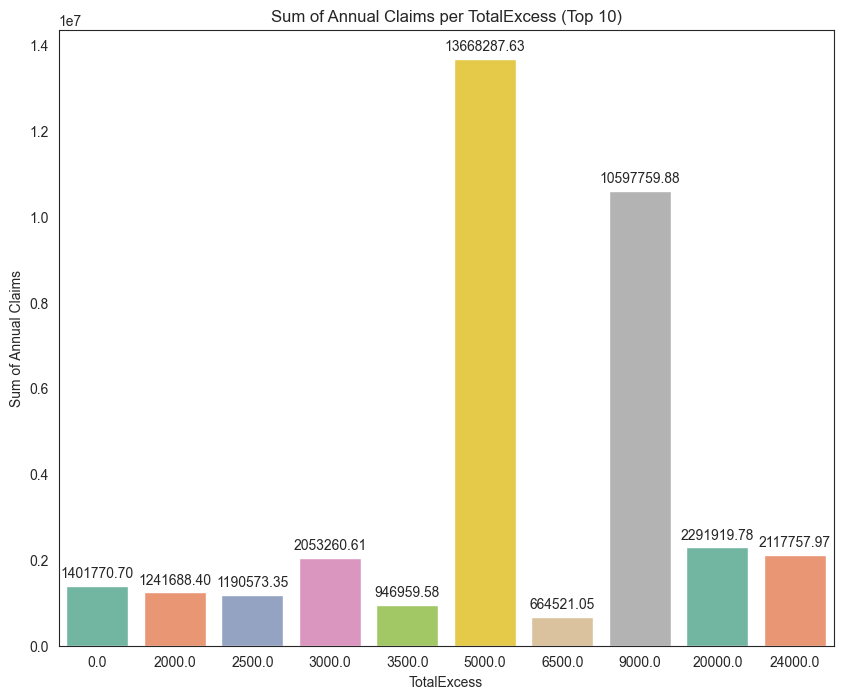

In [45]:

# Plot for Annual Claims per TotalExcess for Polo drivers
cat_plot('TotalExcess', df[df['Model'] == 'polo'], top_n=10)  

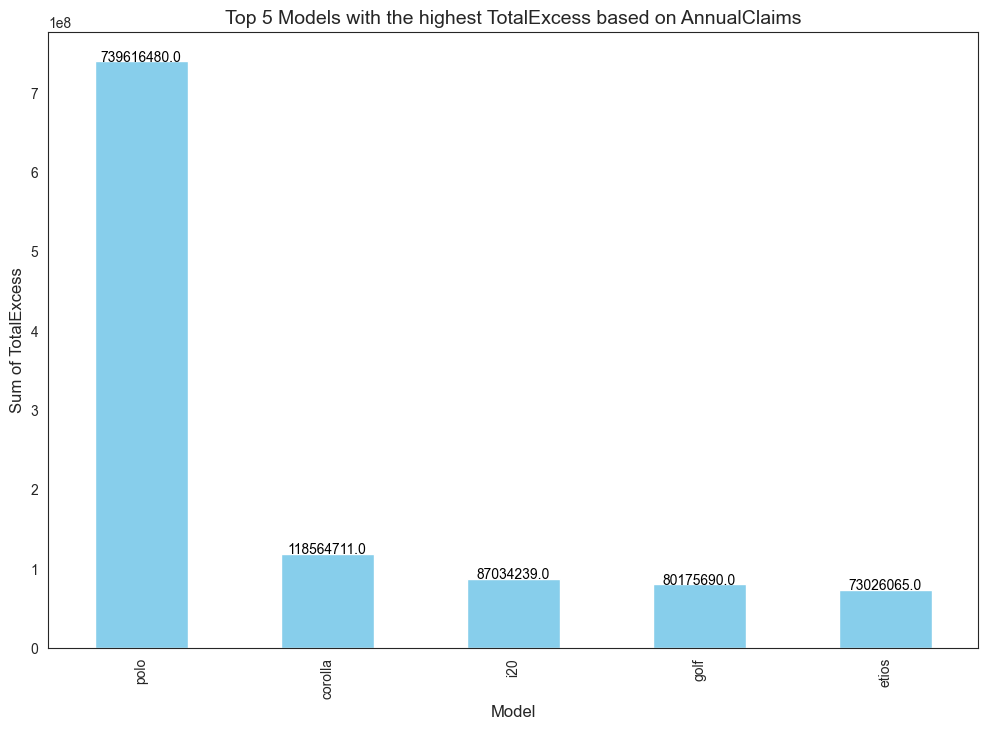

In [46]:
# Calculate the sum of SumAssured and AnnualClaims per Model
model_sums = df.groupby('Model').agg({'TotalExcess': 'sum', 'AnnualClaims': 'sum'})

# Get the top 5 models based on AnnualClaims
top_5_models = model_sums.nlargest(5, 'AnnualClaims')

# Plotting the bar plot for the top 5 models
plt.figure(figsize=(12, 8))
ax = top_5_models['TotalExcess'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Sum of TotalExcess', fontsize=12)
plt.title('Top 5 Models with the highest TotalExcess based on AnnualClaims', fontsize=14)

# Annotate the plot with the total sum for each model
for i, v in enumerate(top_5_models['TotalExcess'].sort_values(ascending=False)):
    ax.text(i, v + 0.2, str(round(v, 2)), color='black', ha='center')

plt.show()


**Insights:**

The highest polo cars that claimed have an access of 5000.00 with 2.39% out of 32.77% in this catagory.

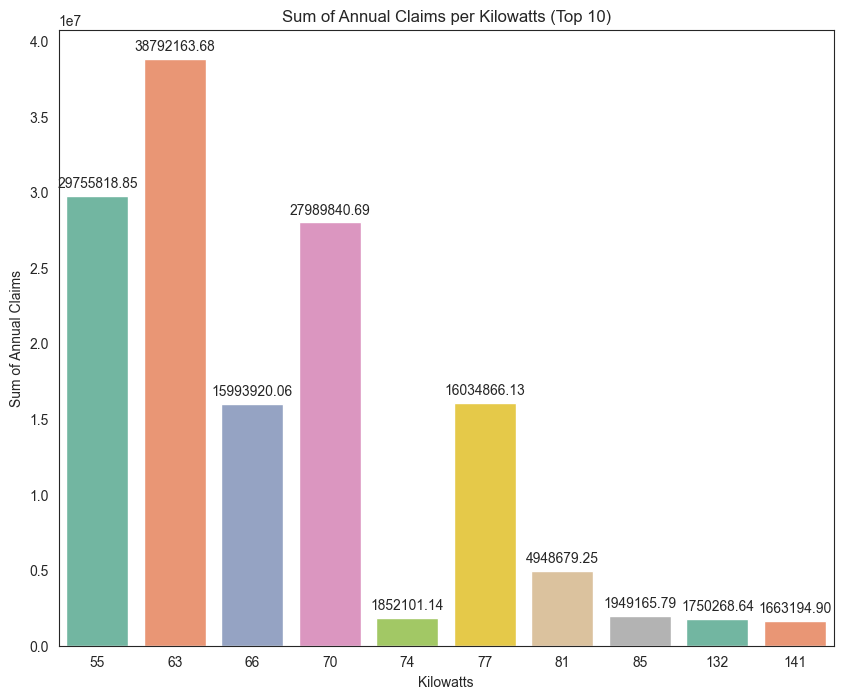

In [47]:
# Plot for Annual Claims per Kilowatts for Polo Drivers
cat_plot('Kilowatts', df[df['Model'] == 'polo'], top_n=10)  

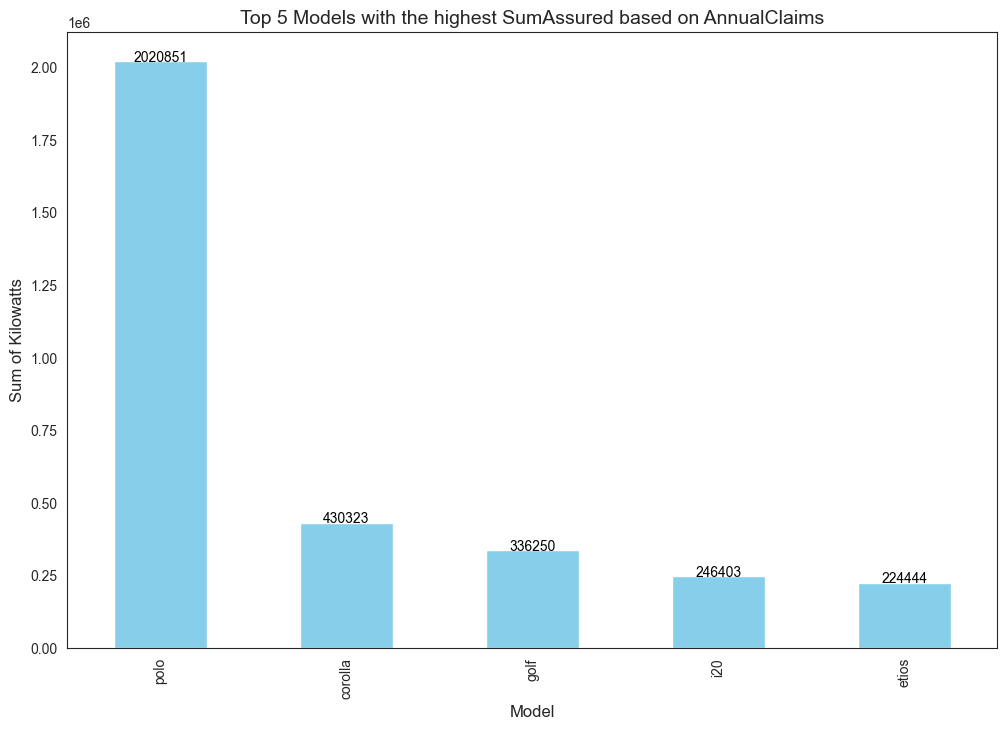

In [48]:
# Calculate the sum of SumAssured and AnnualClaims per Model
model_sums = df.groupby('Model').agg({'Kilowatts': 'sum', 'AnnualClaims': 'sum'})

# Get the top 5 models based on AnnualClaims
top_5_models = model_sums.nlargest(5, 'AnnualClaims')

# Plotting the bar plot for the top 5 models
plt.figure(figsize=(12, 8))
ax = top_5_models['Kilowatts'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Sum of Kilowatts', fontsize=12)
plt.title('Top 5 Models with the highest SumAssured based on AnnualClaims', fontsize=14)

# Annotate the plot with the total sum for each model
for i, v in enumerate(top_5_models['Kilowatts'].sort_values(ascending=False)):
    ax.text(i, v + 0.2, str(round(v, 2)), color='black', ha='center')

plt.show()


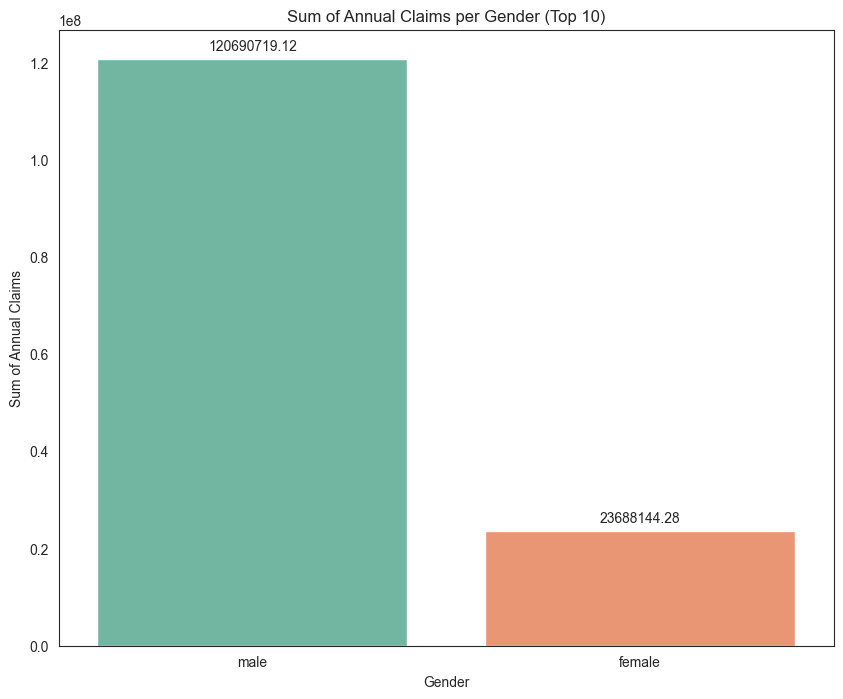

In [49]:
# Plot for Sum of Annual Claims per Gender for Polo drivers
cat_plot('Gender', df[df['Model'] == 'polo'], top_n=10)  

**Insights:**

From the 67.81% of male polo drivers, we notice that 9.14 have accually claimed.

#### Boxplot for all numerical features:

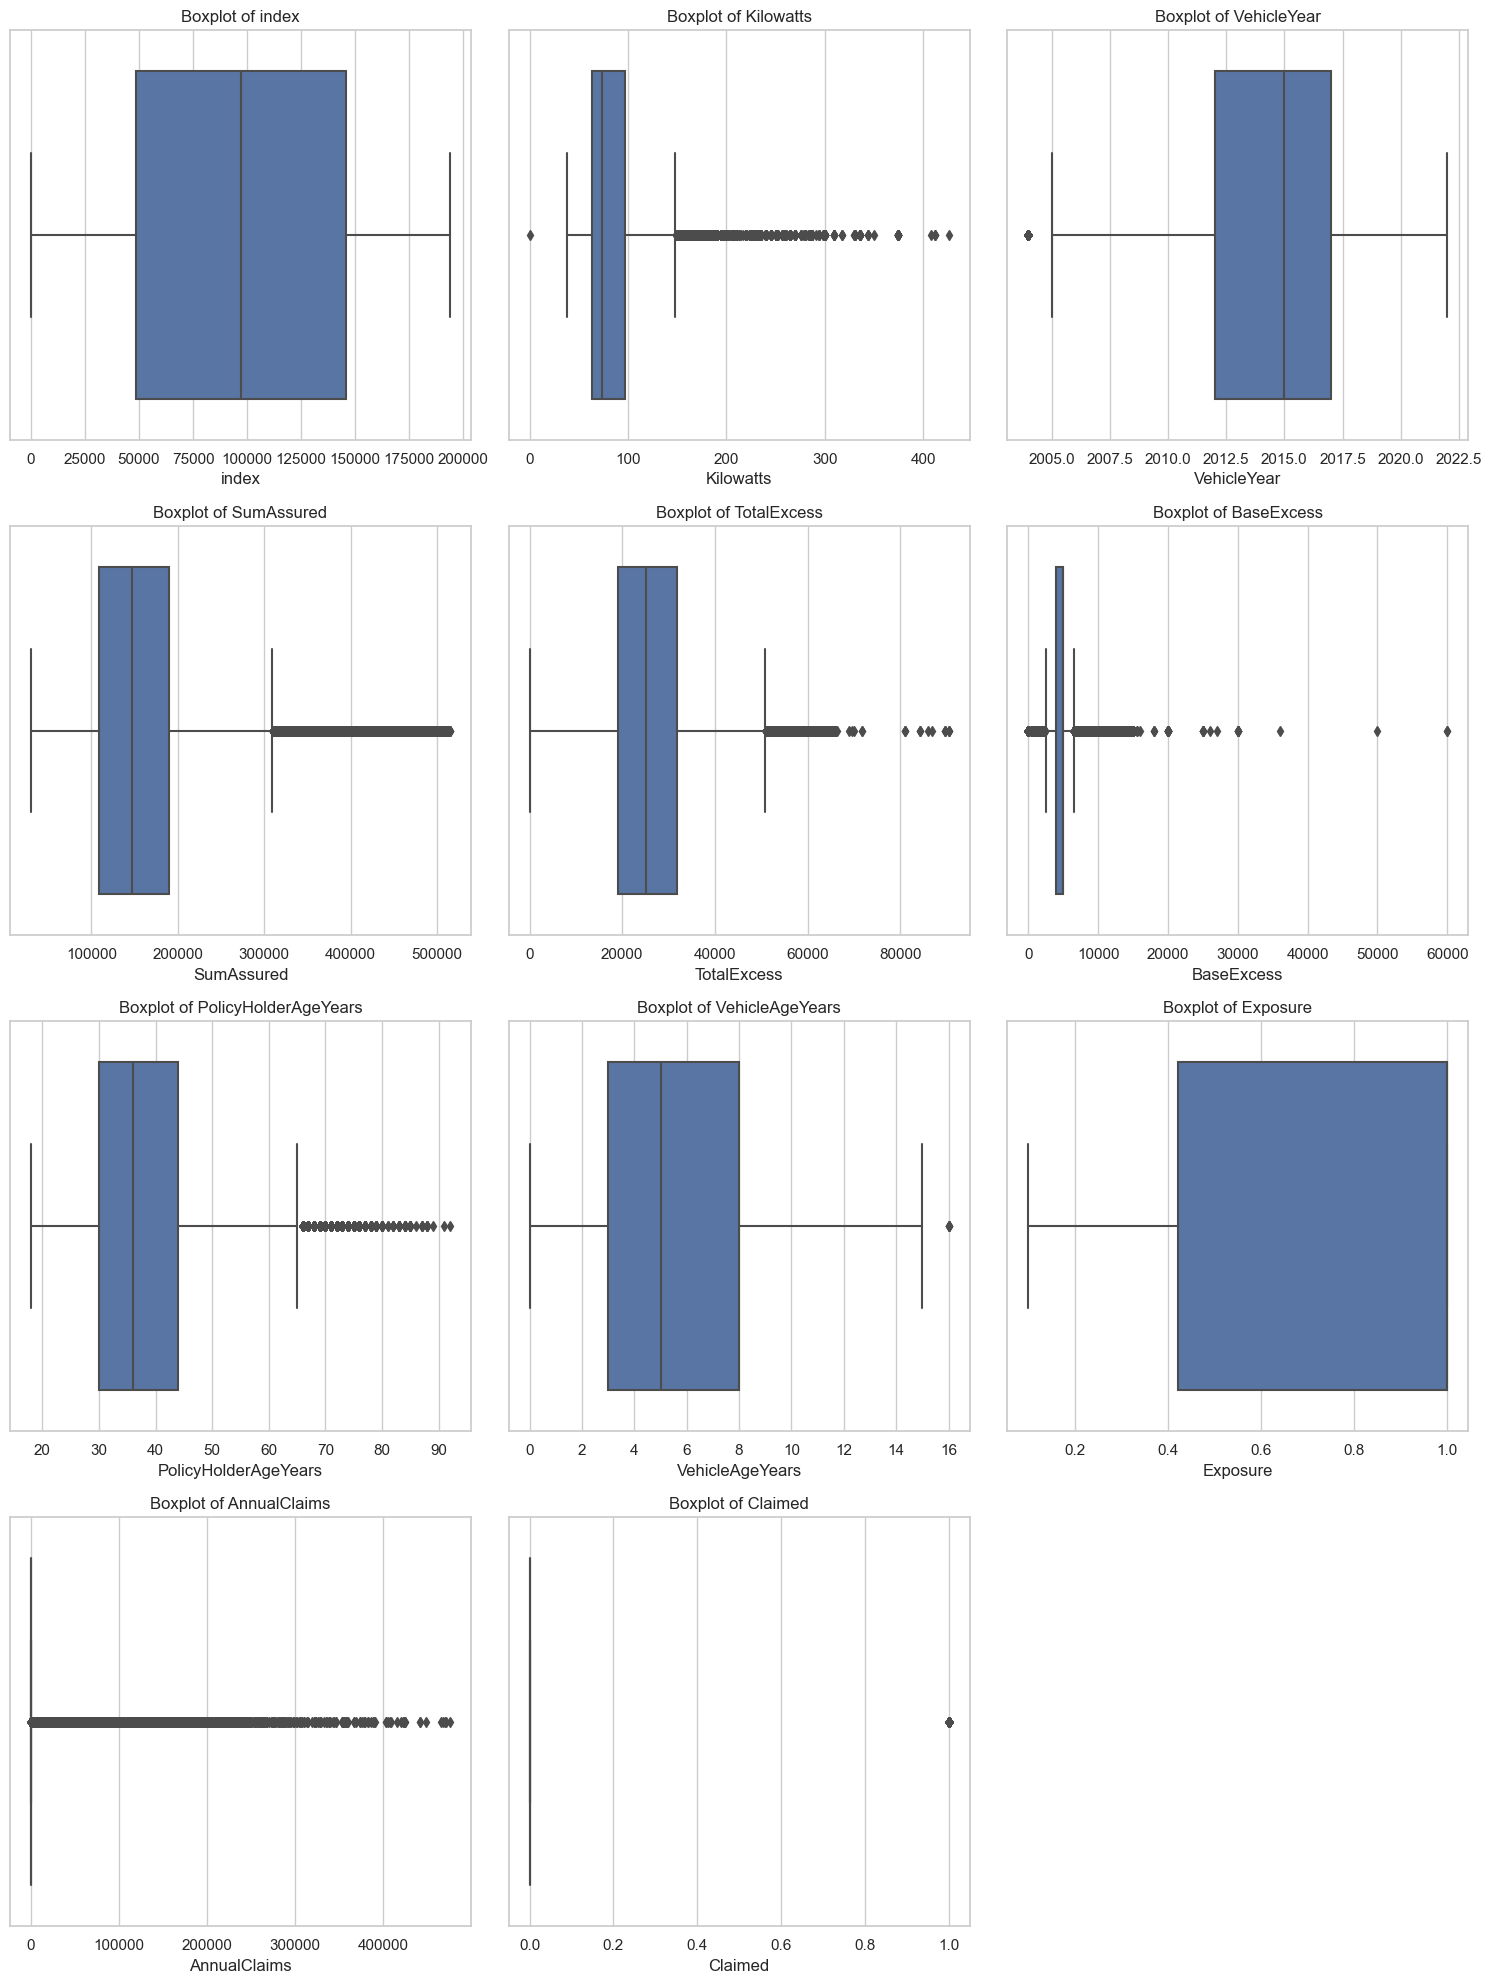

In [50]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
num_features = len(numerical_features)
num_rows = num_features // 3 + (num_features % 3 > 0)
num_cols = min(3, num_features) 
plt.figure(figsize=(15, 5 * num_rows)) 
sns.set(style="whitegrid") 
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

**Insights:**

The data points seem to be irregularly distributed, indicating the presence of outliers in the data. These can not be removed and be assumed error as they are events that actually happened.


#### Correlation:

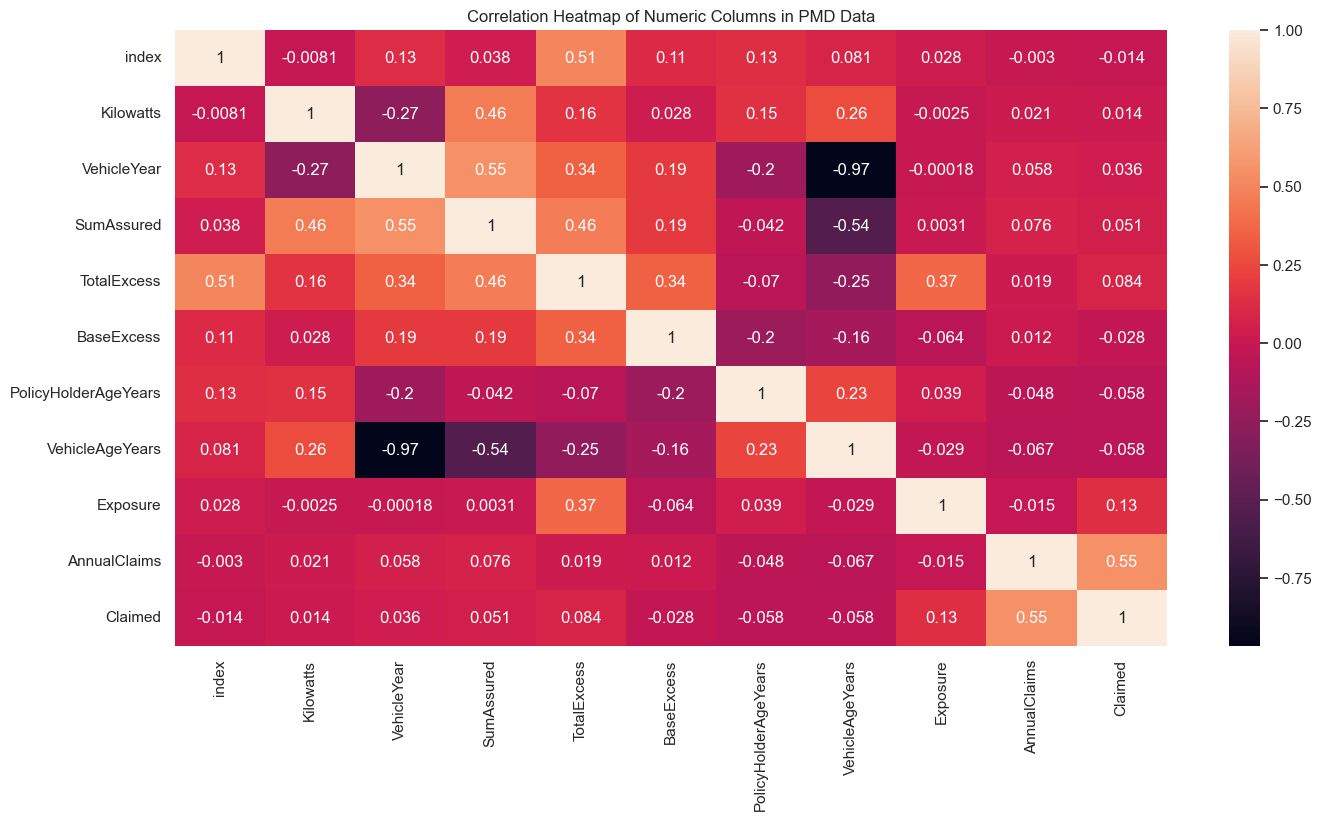

In [51]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(16, 8))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Heatmap of Numeric Columns in PMD Data")
plt.show()

**Insights**:

1. **Positive Correlations:**
   - We observe a moderate positive correlation of 0.46 between the `Kilowatts` of vehicles and their `SumAssured` values. This indicates that vehicles with higher kilowatt ratings tend to have higher insurance coverage, which makes sense as more powerful vehicles might have greater potential risks.

   - Additionally, there is a positive correlation of 0.46 between `TotalExcess` and `SumAssured`. This suggests that policies with higher excess amounts also tend to have higher sum assured values. Policyholders may opt for higher excess amounts in exchange for greater coverage.

2. **Negative Correlations:**
   - One significant negative correlation is observed, which is -0.54 between `VehicleAgeYears` and `SumAssured`. This implies that older vehicles typically have lower insurance coverage. It seems logical as older vehicles might have lower market values and therefore lower insurance requirements.

   - There is a strong negative correlation of -0.97 between `VehicleAgeYears` and `VehicleYear`. This is expected since, as vehicles age, their model years naturally decrease. This correlation reaffirms that newer vehicles tend to have lower ages.

3. **Additional Insights:**
   - The `Exposure` variable, representing the duration of policyholder exposure to risk, shows a positive correlation of 0.37 with `TotalExcess`. This suggests that policies with longer exposure periods may have higher total excess amounts. It's important to consider the implications of longer exposure on policy terms.

   - On the other hand, the `AnnualClaims` variable, which represents the annual claims amount, exhibits only weak correlations with other numerical features. The highest correlation it has is 0.08 with `VehicleYear`. This implies that there may not be strong linear relationships between annual claims and these numerical variables.

### Analysis of Variance Test

In [52]:
categorical_features = ['Occupation', 'IndustryType', 'Gender', 'MaritalStatus', 
                        'Make', 'Model', 'Transmission', 'Colour', 'VehicleType', 'BodyType', 'PolicyMainDriverAnnualMileage',
                        'PolicyMainDriverLicenseDurationRange', 'PersonProvince', 'Area', 'Claimed']

for feature in categorical_features:
    groups = [df['AnnualClaims'][df[feature] == category] for category in df[feature].unique()]
    f_statistic, p_value = stats.f_oneway(*groups)
    
    print(f"Feature: {feature}")
    print("F-statistic:", f_statistic)
    print("P-value:", p_value)
    
    alpha = 0.05
    if p_value < alpha:
        print(f"There is a significant relationship between {feature} and the numerical variable.")
    else:
        print(f"There is no significant relationship between {feature} and the numerical variable.")

Feature: Occupation
F-statistic: nan
P-value: nan
There is no significant relationship between Occupation and the numerical variable.
Feature: IndustryType
F-statistic: 4.15393171972538
P-value: 2.25008848989333e-05
There is a significant relationship between IndustryType and the numerical variable.
Feature: Gender
F-statistic: 72.71729930627406
P-value: 1.5119402965971292e-17
There is a significant relationship between Gender and the numerical variable.
Feature: MaritalStatus
F-statistic: 57.283401757818346
P-value: 5.366397542034997e-37
There is a significant relationship between MaritalStatus and the numerical variable.
Feature: Make
F-statistic: 4.074746223662316
P-value: 3.655091857411331e-21
There is a significant relationship between Make and the numerical variable.
Feature: Model
F-statistic: 1.8379627830661989
P-value: 1.7332276327254116e-28
There is a significant relationship between Model and the numerical variable.
Feature: Transmission
F-statistic: 80.58138280671591
P-valu

### Pre-Processing:

#### Drop Statistically Insignificant Features:

In [53]:
df.drop(['Occupation', 'Model', 'Area','VehicleYear', 'Colour', 'index'], axis=1, inplace=True)

### Change all Characters to Upper Case

In [54]:
# Function to convert text to uppercase
def convert_to_uppercase(text):
    return text.upper() if isinstance(text, str) else text

# Apply the function to text columns only
text_columns = df.select_dtypes(include=['object']).columns
df[text_columns] = df[text_columns].applymap(convert_to_uppercase)

# Print the DataFrame with uppercase text
df

,IndustryType,Gender,MaritalStatus,Make,Kilowatts,Transmission,VehicleType,BodyType,PolicyMainDriverAnnualMileage,PolicyMainDriverLicenseDurationRange,PersonProvince,SumAssured,TotalExcess,BaseExcess,PolicyHolderAgeYears,VehicleAgeYears,Exposure,AnnualClaims,Claimed
0,OFFICE / CLERICAL / MANAGER,FEMALE,SINGLE,RENAULT,88,A,AUTO,X/O,15000+ KM,1 TO 6 YEARS,GAUTENG,241200,43760.0,5000,31,2,1.000000,0.0,0
1,OTHER,FEMALE,SINGLE,TOYOTA,79,A,AUTO,H/B,15000+ KM,<1 YEAR,GAUTENG,272100,60775.0,13605,27,1,1.000000,0.0,0
2,MINING,MALE,MARRIED,MINI,90,A,AUTO,H/B,15000+ KM,15+ YEARS,NORTH WEST,194800,32950.0,5000,48,6,1.000000,0.0,0
3,OTHER,MALE,MARRIED,OPEL,66,M,AUTO,H/B,15000+ KM,11 TO 15 YEARS,GAUTENG,47700,20000.0,5000,30,13,0.838356,0.0,0
4,OFFICE / CLERICAL / MANAGER,MALE,MARRIED,VOLKSWAGEN,118,M,AUTO,S/D,5000 TO 9999 KM,15+ YEARS,GAUTENG,168400,24840.0,3000,36,8,0.210959,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129460,MINING,MALE,MARRIED,VOLKSWAGEN,55,M,AUTO,H/B,5000 TO 9999 KM,1 TO 6 YEARS,LIMPOPO,167900,9000.0,5000,34,1,0.309589,167900.0,1
129461,OTHER,MALE,SINGLE,VOLKSWAGEN,63,M,AUTO,H/B,15000+ KM,6 TO 11 YEARS,GAUTENG,137100,25565.0,6855,30,4,0.183562,0.0,0
129462,OTHER,FEMALE,MARRIED,MERCEDES BENZ,115,A,AUTO,S/D,5000 TO 9999 KM,11 TO 15 YEARS,GAUTENG,228500,9000.0,5000,35,6,0.315068,0.0,0
129463,PROFESSIONAL,MALE,SINGLE,TOYOTA,90,M,AUTO,S/D,5000 TO 9999 KM,1 TO 6 YEARS,EASTERN CAPE,171300,27130.0,5000,25,3,0.906849,0.0,0


### Remove all Spaces and Special Characters from Categorical Features

In [55]:
# Function to clean text (remove spaces and special characters)
def clean_text(text):
    if isinstance(text, str):
        # Remove spaces and special characters using regular expression
        cleaned_text = re.sub(r'[^a-zA-Z0-9]', '', text)
        return cleaned_text
    else:
        return text

# Apply the function to categorical columns only
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].applymap(clean_text)

df

,IndustryType,Gender,MaritalStatus,Make,Kilowatts,Transmission,VehicleType,BodyType,PolicyMainDriverAnnualMileage,PolicyMainDriverLicenseDurationRange,PersonProvince,SumAssured,TotalExcess,BaseExcess,PolicyHolderAgeYears,VehicleAgeYears,Exposure,AnnualClaims,Claimed
0,OFFICECLERICALMANAGER,FEMALE,SINGLE,RENAULT,88,A,AUTO,XO,15000KM,1TO6YEARS,GAUTENG,241200,43760.0,5000,31,2,1.000000,0.0,0
1,OTHER,FEMALE,SINGLE,TOYOTA,79,A,AUTO,HB,15000KM,1YEAR,GAUTENG,272100,60775.0,13605,27,1,1.000000,0.0,0
2,MINING,MALE,MARRIED,MINI,90,A,AUTO,HB,15000KM,15YEARS,NORTHWEST,194800,32950.0,5000,48,6,1.000000,0.0,0
3,OTHER,MALE,MARRIED,OPEL,66,M,AUTO,HB,15000KM,11TO15YEARS,GAUTENG,47700,20000.0,5000,30,13,0.838356,0.0,0
4,OFFICECLERICALMANAGER,MALE,MARRIED,VOLKSWAGEN,118,M,AUTO,SD,5000TO9999KM,15YEARS,GAUTENG,168400,24840.0,3000,36,8,0.210959,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129460,MINING,MALE,MARRIED,VOLKSWAGEN,55,M,AUTO,HB,5000TO9999KM,1TO6YEARS,LIMPOPO,167900,9000.0,5000,34,1,0.309589,167900.0,1
129461,OTHER,MALE,SINGLE,VOLKSWAGEN,63,M,AUTO,HB,15000KM,6TO11YEARS,GAUTENG,137100,25565.0,6855,30,4,0.183562,0.0,0
129462,OTHER,FEMALE,MARRIED,MERCEDESBENZ,115,A,AUTO,SD,5000TO9999KM,11TO15YEARS,GAUTENG,228500,9000.0,5000,35,6,0.315068,0.0,0
129463,PROFESSIONAL,MALE,SINGLE,TOYOTA,90,M,AUTO,SD,5000TO9999KM,1TO6YEARS,EASTERNCAPE,171300,27130.0,5000,25,3,0.906849,0.0,0


In [56]:
df.nunique()

IndustryType                               10
Gender                                      2
MaritalStatus                               4
Make                                       53
Kilowatts                                 192
Transmission                                2
VehicleType                                 2
BodyType                                   17
PolicyMainDriverAnnualMileage               4
PolicyMainDriverLicenseDurationRange        5
PersonProvince                              9
SumAssured                               5735
TotalExcess                              6436
BaseExcess                               1528
PolicyHolderAgeYears                       74
VehicleAgeYears                            17
Exposure                                  330
AnnualClaims                            10148
Claimed                                     2
dtype: int64

In [57]:
print(df.isnull().sum())

IndustryType                            0
Gender                                  0
MaritalStatus                           0
Make                                    0
Kilowatts                               0
Transmission                            0
VehicleType                             0
BodyType                                0
PolicyMainDriverAnnualMileage           0
PolicyMainDriverLicenseDurationRange    0
PersonProvince                          0
SumAssured                              0
TotalExcess                             0
BaseExcess                              0
PolicyHolderAgeYears                    0
VehicleAgeYears                         0
Exposure                                0
AnnualClaims                            0
Claimed                                 0
dtype: int64


In [58]:
df_claimed = df.copy()

#### Handling Catagorical Features:

**Insights:**

The dataset has quiet a number of variable with a higher number of labels.

We can not create a one-hot encoding becouse we have features with 5000 labels, this may impact the accuracy level.

We will use the  One Hot Encoding for Multi Categorical Variables, according to a kaggle challeng won by KDD Cup Orange Challenge with Ensemble Selections. The author limits to 10 most frequent labels of the variable. this means that they would they would make one binary variable for each of the 10 most frequent labels only.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129465 entries, 0 to 129464
Data columns (total 19 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   IndustryType                          129465 non-null  object 
 1   Gender                                129465 non-null  object 
 2   MaritalStatus                         129465 non-null  object 
 3   Make                                  129465 non-null  object 
 4   Kilowatts                             129465 non-null  int64  
 5   Transmission                          129465 non-null  object 
 6   VehicleType                           129465 non-null  object 
 7   BodyType                              129465 non-null  object 
 8   PolicyMainDriverAnnualMileage         129465 non-null  object 
 9   PolicyMainDriverLicenseDurationRange  129465 non-null  object 
 10  PersonProvince                        129465 non-null  object 
 11  

### Encode the Categorical Features

In [60]:
import category_encoders as ce

# Initialize the BinaryEncoder
encoder = ce.BinaryEncoder(cols=['Gender', 'Transmission', 'VehicleType'])

# Apply binary encoding to the categorical features
df_encoded = encoder.fit_transform(df)

# Initialize the LabelEncoder
encoder = LabelEncoder()

# List of categorical feature column names to label encode
categorical_features = ['PolicyMainDriverAnnualMileage', 'PolicyMainDriverLicenseDurationRange']

# Apply label encoding to each feature
for feature in categorical_features:
    df_encoded[f'{feature}_LabelEncoded'] = encoder.fit_transform(df_encoded[feature])

# Initialize the TargetEncoder
encoder = ce.TargetEncoder(cols=['IndustryType', 'PersonProvince', 'MaritalStatus'])

# Apply target encoding to the categorical features
df_encoded = encoder.fit_transform(df_encoded, df_encoded['AnnualClaims'])


# Create a dictionary to map each category to its frequency count
make_counts = df['Make'].value_counts().to_dict()
bodytype_counts = df['BodyType'].value_counts().to_dict()

# Apply frequency encoding to the categorical features
df_encoded['Make_Frequency'] = df_encoded['Make'].map(make_counts)
df_encoded['BodyType_Frequency'] = df_encoded['BodyType'].map(bodytype_counts)


In [61]:
df_encoded

,IndustryType,Gender_0,Gender_1,MaritalStatus,Make,Kilowatts,Transmission_0,Transmission_1,VehicleType_0,VehicleType_1,BodyType,PolicyMainDriverAnnualMileage,PolicyMainDriverLicenseDurationRange,PersonProvince,SumAssured,TotalExcess,BaseExcess,PolicyHolderAgeYears,VehicleAgeYears,Exposure,AnnualClaims,Claimed,PolicyMainDriverAnnualMileage_LabelEncoded,PolicyMainDriverLicenseDurationRange_LabelEncoded,Make_Frequency,BodyType_Frequency
0,4227.930348,0,1,5115.367443,RENAULT,88,0,1,0,1,XO,15000KM,1TO6YEARS,4246.330909,241200,43760.0,5000,31,2,1.000000,0.0,0,1,2,8588,952
1,4002.637839,0,1,5115.367443,TOYOTA,79,0,1,0,1,HB,15000KM,1YEAR,4246.330909,272100,60775.0,13605,27,1,1.000000,0.0,0,1,3,15618,73674
2,4725.571407,1,0,3489.605272,MINI,90,0,1,0,1,HB,15000KM,15YEARS,4370.114616,194800,32950.0,5000,48,6,1.000000,0.0,0,1,1,508,73674
3,4002.637839,1,0,3489.605272,OPEL,66,1,0,0,1,HB,15000KM,11TO15YEARS,4246.330909,47700,20000.0,5000,30,13,0.838356,0.0,0,1,0,1823,73674
4,4227.930348,1,0,3489.605272,VOLKSWAGEN,118,1,0,0,1,SD,5000TO9999KM,15YEARS,4246.330909,168400,24840.0,3000,36,8,0.210959,0.0,0,3,1,35878,26676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129460,4725.571407,1,0,3489.605272,VOLKSWAGEN,55,1,0,0,1,HB,5000TO9999KM,1TO6YEARS,4262.022133,167900,9000.0,5000,34,1,0.309589,167900.0,1,3,2,35878,73674
129461,4002.637839,1,0,5115.367443,VOLKSWAGEN,63,1,0,0,1,HB,15000KM,6TO11YEARS,4246.330909,137100,25565.0,6855,30,4,0.183562,0.0,0,1,4,35878,73674
129462,4002.637839,0,1,3489.605272,MERCEDESBENZ,115,0,1,0,1,SD,5000TO9999KM,11TO15YEARS,4246.330909,228500,9000.0,5000,35,6,0.315068,0.0,0,3,0,3775,26676
129463,5028.122499,1,0,5115.367443,TOYOTA,90,1,0,0,1,SD,5000TO9999KM,1TO6YEARS,5158.592993,171300,27130.0,5000,25,3,0.906849,0.0,0,3,2,15618,26676


### Drop all Categorical Features


In [62]:
df_clean = df_encoded.drop(['Make', 'BodyType', 'PolicyMainDriverAnnualMileage', 'PolicyMainDriverLicenseDurationRange'], axis=1)

In [63]:
df_clean

,IndustryType,Gender_0,Gender_1,MaritalStatus,Kilowatts,Transmission_0,Transmission_1,VehicleType_0,VehicleType_1,PersonProvince,SumAssured,TotalExcess,BaseExcess,PolicyHolderAgeYears,VehicleAgeYears,Exposure,AnnualClaims,Claimed,PolicyMainDriverAnnualMileage_LabelEncoded,PolicyMainDriverLicenseDurationRange_LabelEncoded,Make_Frequency,BodyType_Frequency
0,4227.930348,0,1,5115.367443,88,0,1,0,1,4246.330909,241200,43760.0,5000,31,2,1.000000,0.0,0,1,2,8588,952
1,4002.637839,0,1,5115.367443,79,0,1,0,1,4246.330909,272100,60775.0,13605,27,1,1.000000,0.0,0,1,3,15618,73674
2,4725.571407,1,0,3489.605272,90,0,1,0,1,4370.114616,194800,32950.0,5000,48,6,1.000000,0.0,0,1,1,508,73674
3,4002.637839,1,0,3489.605272,66,1,0,0,1,4246.330909,47700,20000.0,5000,30,13,0.838356,0.0,0,1,0,1823,73674
4,4227.930348,1,0,3489.605272,118,1,0,0,1,4246.330909,168400,24840.0,3000,36,8,0.210959,0.0,0,3,1,35878,26676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129460,4725.571407,1,0,3489.605272,55,1,0,0,1,4262.022133,167900,9000.0,5000,34,1,0.309589,167900.0,1,3,2,35878,73674
129461,4002.637839,1,0,5115.367443,63,1,0,0,1,4246.330909,137100,25565.0,6855,30,4,0.183562,0.0,0,1,4,35878,73674
129462,4002.637839,0,1,3489.605272,115,0,1,0,1,4246.330909,228500,9000.0,5000,35,6,0.315068,0.0,0,3,0,3775,26676
129463,5028.122499,1,0,5115.367443,90,1,0,0,1,5158.592993,171300,27130.0,5000,25,3,0.906849,0.0,0,3,2,15618,26676


In [64]:
# Checking the shape of the DataFrame
df_clean.shape

(129465, 22)

In [65]:
df_clean.dtypes

IndustryType                                         float64
Gender_0                                               int64
Gender_1                                               int64
MaritalStatus                                        float64
Kilowatts                                              int64
Transmission_0                                         int64
Transmission_1                                         int64
VehicleType_0                                          int64
VehicleType_1                                          int64
PersonProvince                                       float64
SumAssured                                             int64
TotalExcess                                          float64
BaseExcess                                             int64
PolicyHolderAgeYears                                   int64
VehicleAgeYears                                        int64
Exposure                                             float64
AnnualClaims            

<a id="five"></a>

# Feature Engineering

[Back to Table of Contents](#table-of-contents)

### Total and Base Excess Ratio

#### This feature gives insight into the overall riskiness of the policy holder

In [66]:
df_engineered = df_clean.copy()

In [67]:
df_engineered['Total/BaseExcess'] = df_engineered['TotalExcess'] / df_engineered['BaseExcess']

In [68]:
df_engineered

,IndustryType,Gender_0,Gender_1,MaritalStatus,Kilowatts,Transmission_0,Transmission_1,VehicleType_0,VehicleType_1,PersonProvince,SumAssured,TotalExcess,BaseExcess,PolicyHolderAgeYears,VehicleAgeYears,Exposure,AnnualClaims,Claimed,PolicyMainDriverAnnualMileage_LabelEncoded,PolicyMainDriverLicenseDurationRange_LabelEncoded,Make_Frequency,BodyType_Frequency,Total/BaseExcess
0,4227.930348,0,1,5115.367443,88,0,1,0,1,4246.330909,241200,43760.0,5000,31,2,1.000000,0.0,0,1,2,8588,952,8.752000
1,4002.637839,0,1,5115.367443,79,0,1,0,1,4246.330909,272100,60775.0,13605,27,1,1.000000,0.0,0,1,3,15618,73674,4.467108
2,4725.571407,1,0,3489.605272,90,0,1,0,1,4370.114616,194800,32950.0,5000,48,6,1.000000,0.0,0,1,1,508,73674,6.590000
3,4002.637839,1,0,3489.605272,66,1,0,0,1,4246.330909,47700,20000.0,5000,30,13,0.838356,0.0,0,1,0,1823,73674,4.000000
4,4227.930348,1,0,3489.605272,118,1,0,0,1,4246.330909,168400,24840.0,3000,36,8,0.210959,0.0,0,3,1,35878,26676,8.280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129460,4725.571407,1,0,3489.605272,55,1,0,0,1,4262.022133,167900,9000.0,5000,34,1,0.309589,167900.0,1,3,2,35878,73674,1.800000
129461,4002.637839,1,0,5115.367443,63,1,0,0,1,4246.330909,137100,25565.0,6855,30,4,0.183562,0.0,0,1,4,35878,73674,3.729395
129462,4002.637839,0,1,3489.605272,115,0,1,0,1,4246.330909,228500,9000.0,5000,35,6,0.315068,0.0,0,3,0,3775,26676,1.800000
129463,5028.122499,1,0,5115.367443,90,1,0,0,1,5158.592993,171300,27130.0,5000,25,3,0.906849,0.0,0,3,2,15618,26676,5.426000


In [69]:
# Checking the shape of the DataFrame
print(df_engineered.shape)

(129465, 23)


<a id="six"></a>

# Model and Model Evaluation

[Back to Table of Contents](#table-of-contents)

## Hybrid Model (Classification & Regression)

### First we will train the model to predict whether or not someone made a claim


In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from interpret.glassbox import ExplainableBoostingRegressor
from sklearn.linear_model import GammaRegressor
import shap
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

### Random Forest Classifier

In [71]:
# Load your dataset
data = df_clean.copy()

# Separate features and labels for classification
X_classification = data.drop(['Claimed', 'AnnualClaims'], axis=1)
y_classification = data['Claimed']

# Over-sample the minority class (claimed) to balance the classification dataset using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=10)
X_resampled_classification, y_resampled_classification = smote.fit_resample(X_classification, y_classification)

# Split the resampled data into train and test sets for classification
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_resampled_classification, 
                                                                                                                y_resampled_classification, test_size=0.2, 
                                                                                                                random_state=42)

# Train the binary classification model (Random Forest)
from sklearn.ensemble import RandomForestClassifier

classification_model = RandomForestClassifier(class_weight={0: 0.5, 1: 0.5}, random_state=42)
classification_model.fit(X_train_classification, y_train_classification)

classification_predictions = classification_model.predict(X_test_classification)

# Classification report for Random Forest Classifier with custom class names
target_names = ['No Claims', 'Claimed']
classification_report_result = classification_report(y_test_classification, classification_predictions, target_names=target_names)
print("Classification Report:\n", classification_report_result)


Classification Report:
               precision    recall  f1-score   support

   No Claims       0.89      0.95      0.92     23061
     Claimed       0.94      0.88      0.91     23349

    accuracy                           0.91     46410
   macro avg       0.92      0.91      0.91     46410
weighted avg       0.92      0.91      0.91     46410



### Insights

The classification report indicates a strong performance of the model in distinguishing between insurance claims being made (Class 1) and no claims being made (Class 0). Here are the key findings:

1. **Precision:**
   - Class 0 (No Claim): 89%
   - Class 1 (Claim Made): 94%
  
   Precision reflects the accuracy of the model when it predicts a certain class. In this context, when the model predicts no claim (Class 0), it is correct 89% of the time. Similarly, when predicting a claim (Class 1), the correctness rate is 94%.

2. **Recall:**
   - Class 0 (No Claim): 95%
   - Class 1 (Claim Made): 88%
  
   Recall, also known as sensitivity, gauges the model's ability to capture instances of a particular class. For Class 0 (No Claim), the model successfully identifies 95% of actual instances, while for Class 1 (Claim Made), it captures 88%.

3. **F1-Score:**
   - Both Class 0 and Class 1: ~92%
   
   The F1-score is the harmonic mean of precision and recall. With scores around 92% for both classes, the model demonstrates a balanced performance between precision and recall.

4. **Accuracy:**
   - Overall Accuracy: 91%
   
   The overall accuracy of 91% indicates the proportion of correctly predicted instances across both classes.

In summary, the model exhibits a commendable ability to discern between insurance claims and non-claims, striking a good balance between precision and recall. These metrics collectively affirm the reliability of the model in its predictive capabilities for the given binary classification task.

In [72]:
# Split the data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Separate features and labels for regression
X_regression = train_data.drop(['AnnualClaims'], axis=1)
y_regression = train_data['AnnualClaims']

# Ensure all values are positive
y_regression = y_regression.apply(lambda x: max(x, 0.01))  # Adding a small constant to handle zeros

### Generalised Linear Model (Gamma Regressor)

In [73]:
from sklearn.linear_model import GammaRegressor

# Gamma regression (equivalent to Tweedie regression with power=1.5)
glm_model = GammaRegressor(alpha=2)
glm_model.fit(X_regression, y_regression, sample_weight=train_data['Exposure'])

# Make predictions
glm_predictions = glm_model.predict(test_data.drop(['AnnualClaims'], axis=1))

# Calculate RMSE
glm_rmse = mean_squared_error(test_data['AnnualClaims'], glm_predictions, squared=False)
print("Gamma Regressor RMSE:", glm_rmse)


Gamma Regressor RMSE: 22865.606324659086


In [74]:
# GLM coefficients for Gamma regression
glm_coefficients = glm_model.coef_
print("GLM  Coefficients:", glm_coefficients)

GLM  Coefficients: [-2.39787216e-04  2.64143851e-07 -4.11125336e-07  1.23876789e-04
 -2.41163021e-05 -1.50524262e-08 -1.31929059e-07 -1.25242400e-07
 -2.17390851e-08 -7.54793376e-05  6.88147501e-06 -1.59257636e-05
 -2.25331953e-05 -2.43004524e-05 -6.28150492e-06 -2.83231733e-07
  7.44453253e-06 -3.47823473e-07  1.24347052e-06  2.27654408e-06
  3.07535782e-06]


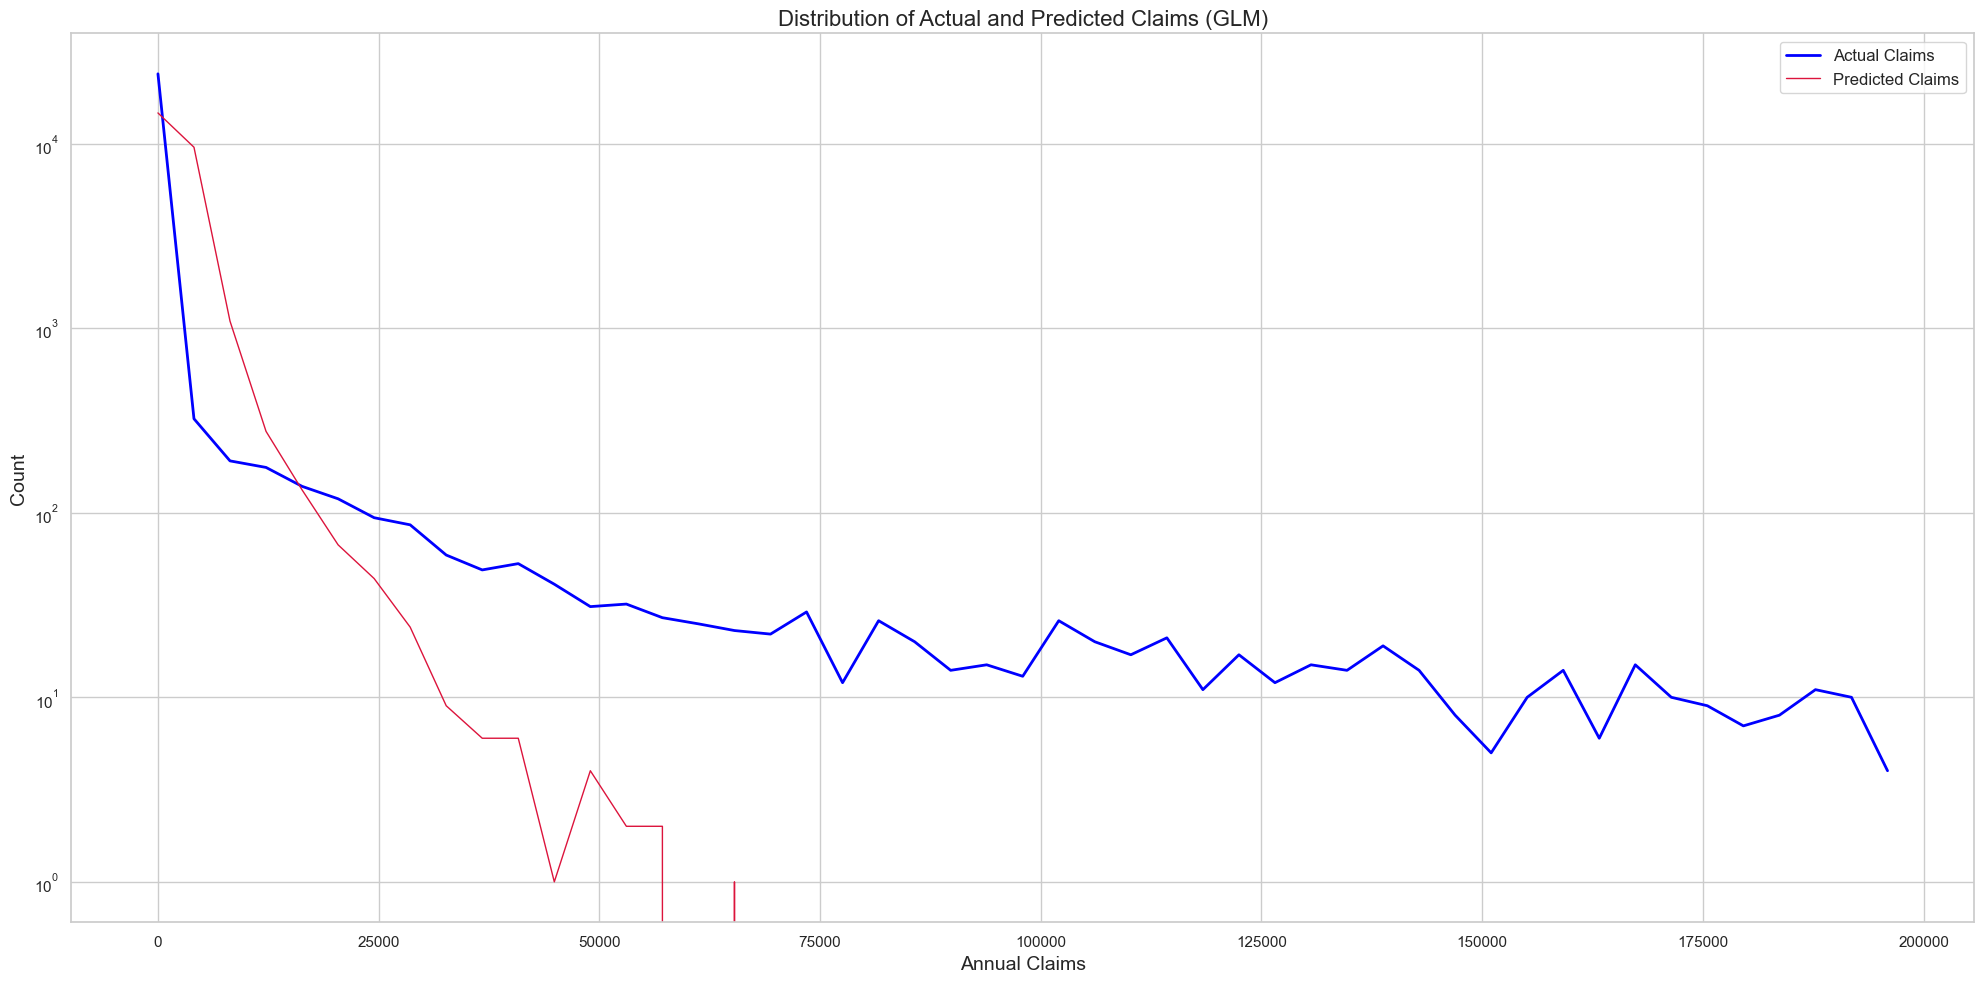

In [75]:
y_test = test_data['AnnualClaims']


# Create figure with a single subplot
fig, ax = plt.subplots(figsize=(20, 10))

# Create bins for the histogram
bins = np.linspace(0, 200000, 50)

# Plot the actual and predicted values as line graphs
ax.plot(bins[:-1], np.histogram(y_test[y_test < 200000], bins=bins)[0], color='blue', linewidth=2, label='Actual Claims')
ax.plot(bins[:-1], np.histogram(glm_predictions[glm_predictions < 200000], bins=bins)[0], color='crimson', linewidth=1, label='Predicted Claims')

# Set the plot title and axis labels
ax.set_title('Distribution of Actual and Predicted Claims (GLM)', fontsize=16)
ax.set_xlabel('Annual Claims', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Add a legend to the plot
ax.legend(fontsize=12)

# Set log scale on the y-axis
ax.set_yscale('log')

# Remove unnecessary white space
plt.tight_layout()

# Display the plot
plt.show()


### Random Forest Regressor

In [76]:
# Random Forest with sample weights
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_regression, y_regression, sample_weight=train_data['Exposure'])  #'Exposure' is the feature to give weights

# Make predictions
rf_predictions = rf_model.predict(test_data.drop(['AnnualClaims'], axis=1))

# Calculate RMSE
rf_rmse = mean_squared_error(test_data['AnnualClaims'], rf_predictions, squared=False)
print("Random Forest RMSE:", rf_rmse)

Random Forest RMSE: 16743.612505043136


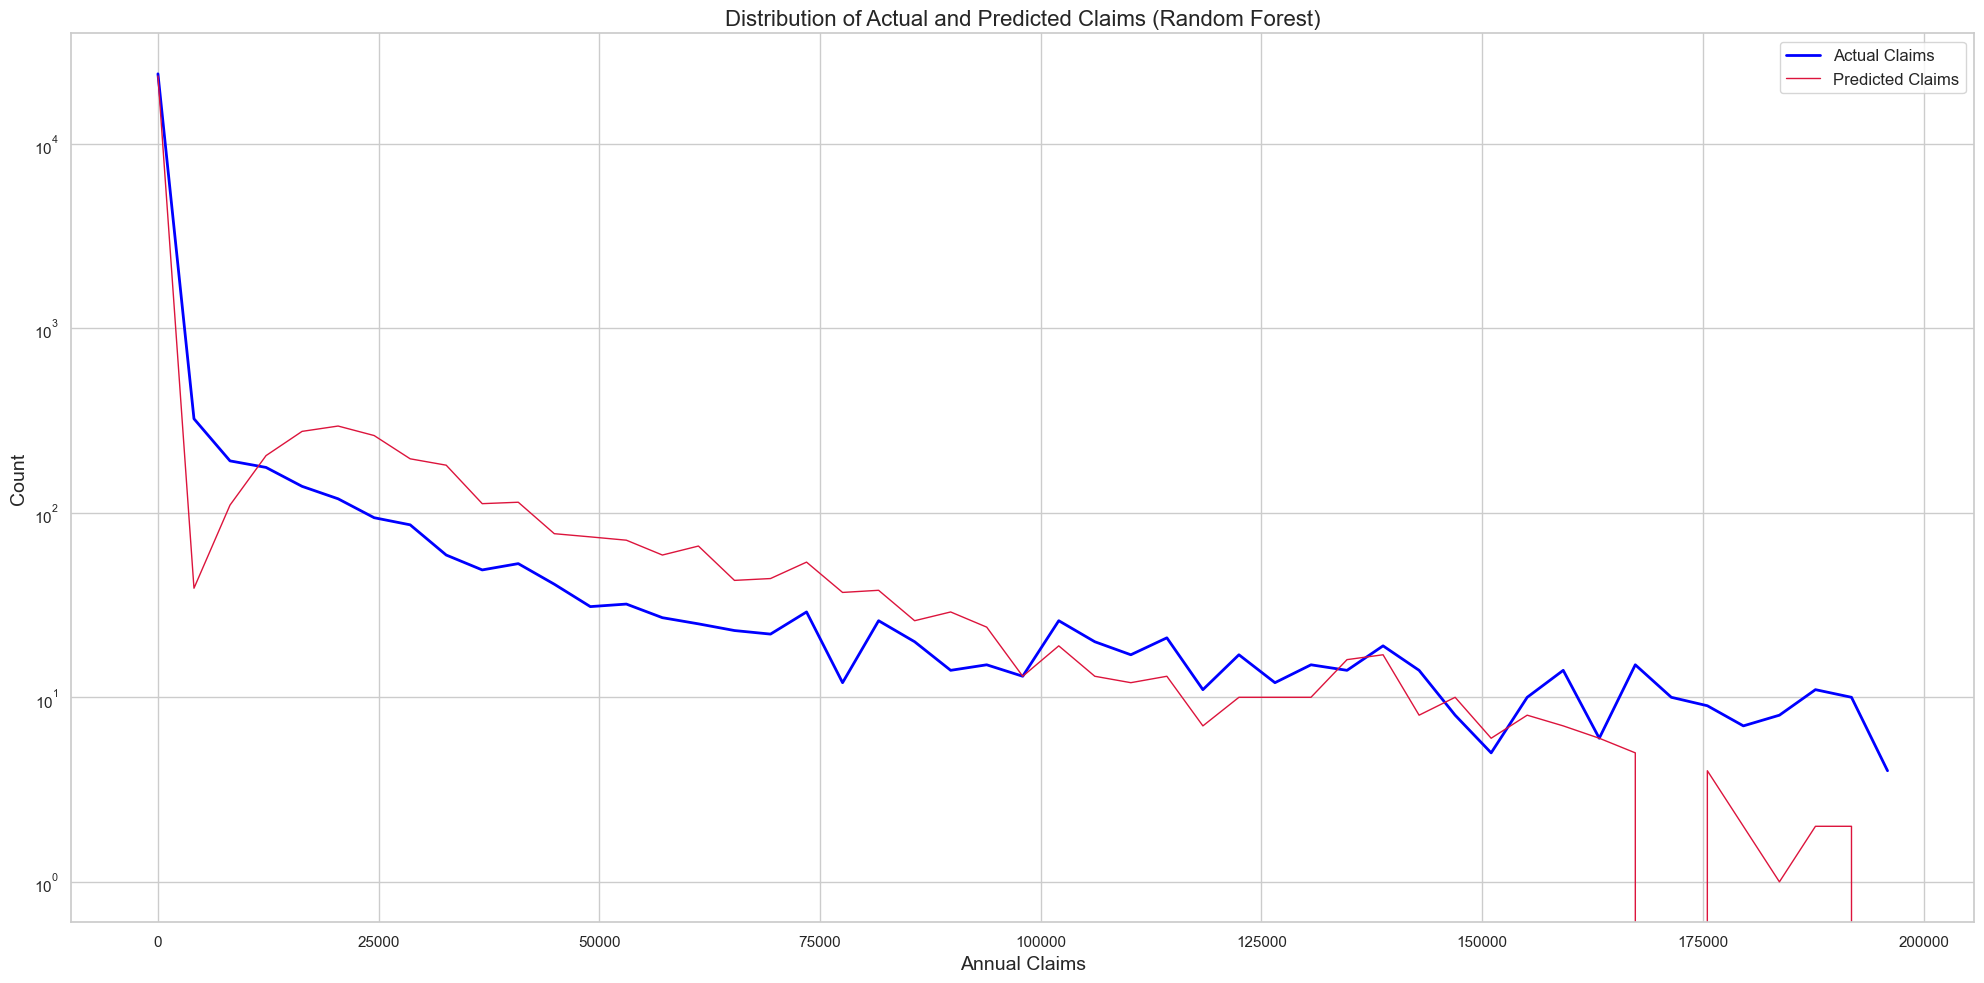

In [77]:

# Create figure with a single subplot
fig, ax = plt.subplots(figsize=(20, 10))

# Create bins for the histogram
bins = np.linspace(0, 200000, 50)

# Plot the actual and predicted values as line graphs
ax.plot(bins[:-1], np.histogram(y_test[y_test < 200000], bins=bins)[0], color='blue', linewidth=2, label='Actual Claims')
ax.plot(bins[:-1], np.histogram(rf_predictions[rf_predictions < 200000], bins=bins)[0], color='crimson', linewidth=1, label='Predicted Claims')

# Set the plot title and axis labels
ax.set_title('Distribution of Actual and Predicted Claims (Random Forest)', fontsize=16)
ax.set_xlabel('Annual Claims', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Add a legend to the plot
ax.legend(fontsize=12)

# Set log scale on the y-axis
ax.set_yscale('log')

# Remove unnecessary white space
plt.tight_layout()

# Display the plot
plt.show()


### CatBoost Regressor

In [78]:

# CatBoost with Tweedie distribution and sample weights
catboost_model = CatBoostRegressor(iterations=100, depth=10, learning_rate=0.05, loss_function='Tweedie:variance_power=1.3', verbose=False)
catboost_model.fit(X_regression, y_regression, sample_weight=train_data['Exposure'])  # 'Exposure' is the feature to give weights

# Make predictions
catboost_predictions = catboost_model.predict(test_data.drop(['AnnualClaims'], axis=1))

# Calculate RMSE
catboost_rmse = mean_squared_error(test_data['AnnualClaims'], catboost_predictions, squared=False)
print("CatBoost with Tweedie Distribution and Weighted Samples RMSE:", catboost_rmse)


CatBoost with Tweedie Distribution and Weighted Samples RMSE: 16928.081996521752


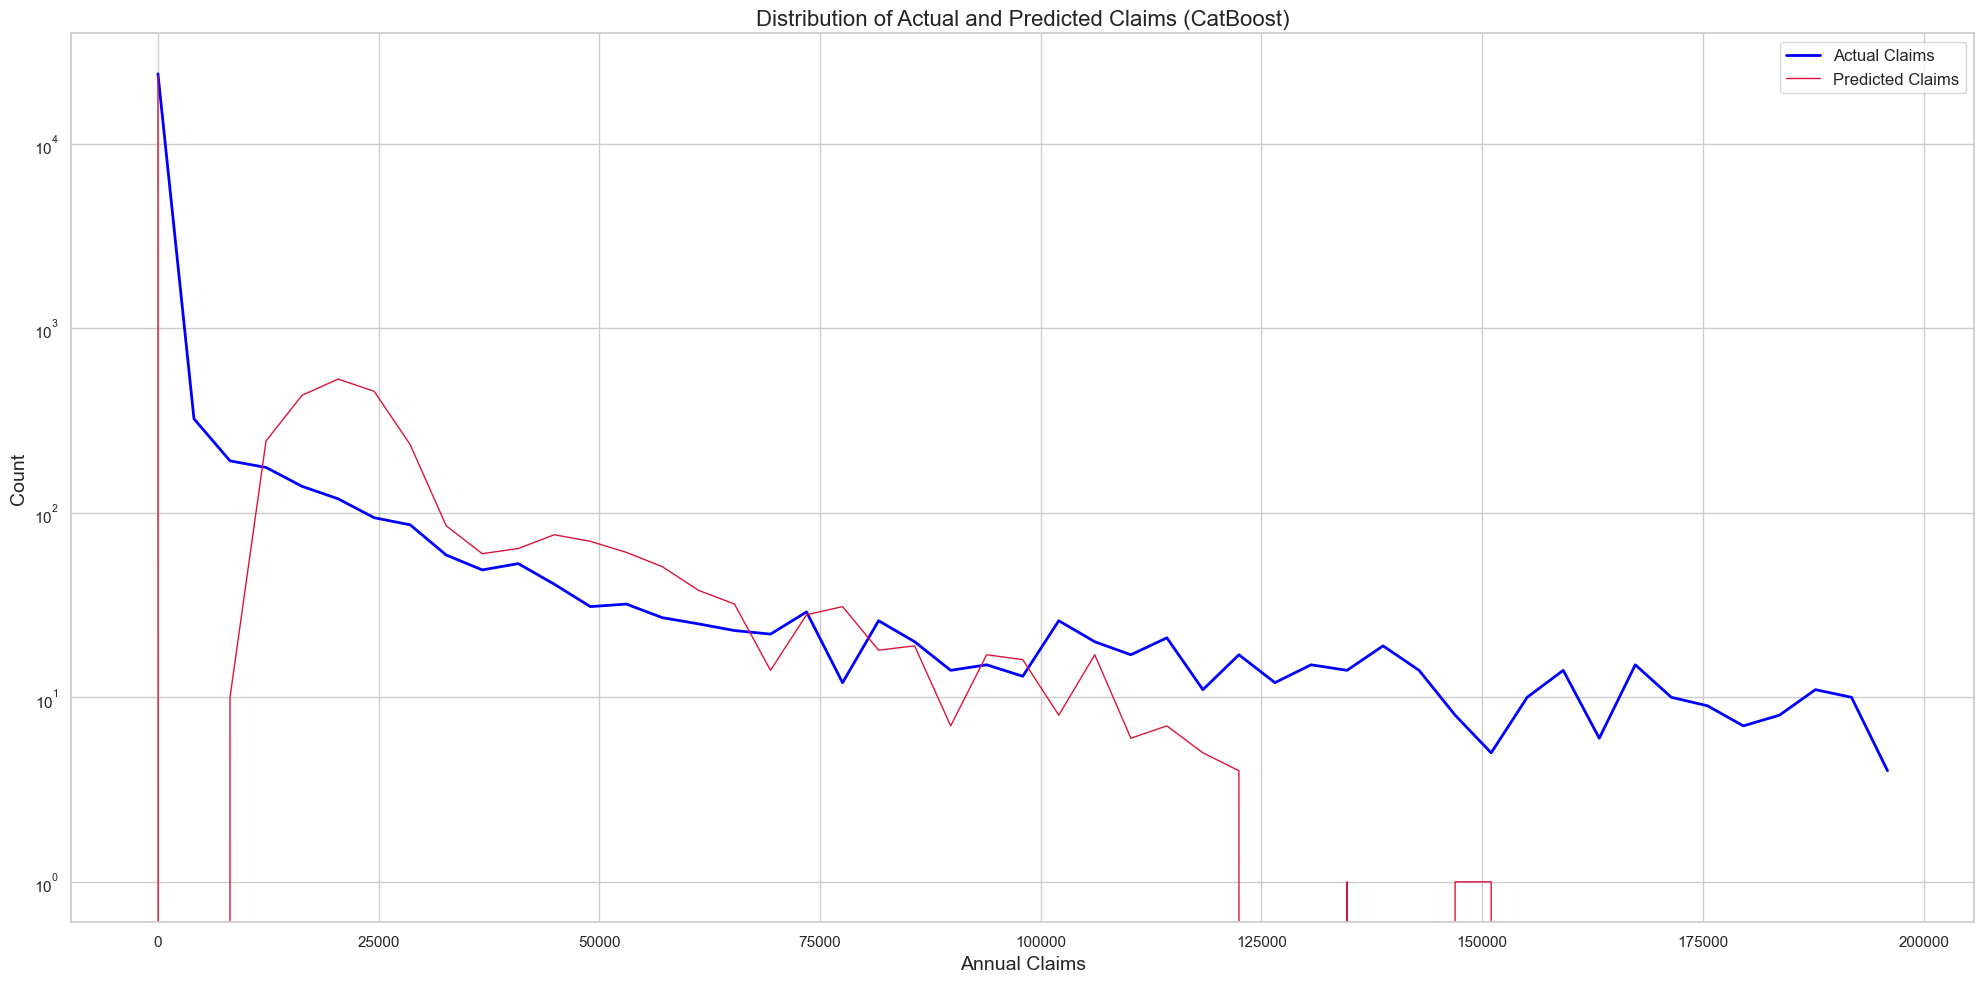

In [79]:

# Create figure with a single subplot
fig, ax = plt.subplots(figsize=(20, 10))

# Create bins for the histogram
bins = np.linspace(0, 200000,50)

# Plot the actual and predicted values as line graphs
ax.plot(bins[:-1], np.histogram(y_test[y_test < 200000], bins=bins)[0], color='blue', linewidth=2, label='Actual Claims')
ax.plot(bins[:-1], np.histogram(catboost_predictions[catboost_predictions < 200000], bins=bins)[0], color='crimson', linewidth=1, label='Predicted Claims')

# Set the plot title and axis labels
ax.set_title('Distribution of Actual and Predicted Claims (CatBoost)', fontsize=16)
ax.set_xlabel('Annual Claims', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Add a legend to the plot
ax.legend(fontsize=12)

# Set log scale on the y-axis
ax.set_yscale('log')

# Remove unnecessary white space
plt.tight_layout()

# Display the plot
plt.show()


### XGBoost Regressor

In [80]:
from xgboost import XGBRegressor

# XGBoost with gamma and Poisson distributions
xgboost_model = XGBRegressor(objective="reg:tweedie", tweedie_variance_power=1.9)
xgboost_model.fit(X_regression, y_regression, sample_weight=train_data['Exposure'])  #'Exposure' is the feature to give weights

# Make predictions
xgboost_predictions = xgboost_model.predict(test_data.drop(['AnnualClaims'], axis=1))

# Calculate RMSE
xgboost_rmse = mean_squared_error(test_data['AnnualClaims'], xgboost_predictions, squared=False)
print("XGBoost with Tweedie Distribution and Weighted Samples RMSE:", xgboost_rmse)


XGBoost with Tweedie Distribution and Weighted Samples RMSE: 16978.10897244388


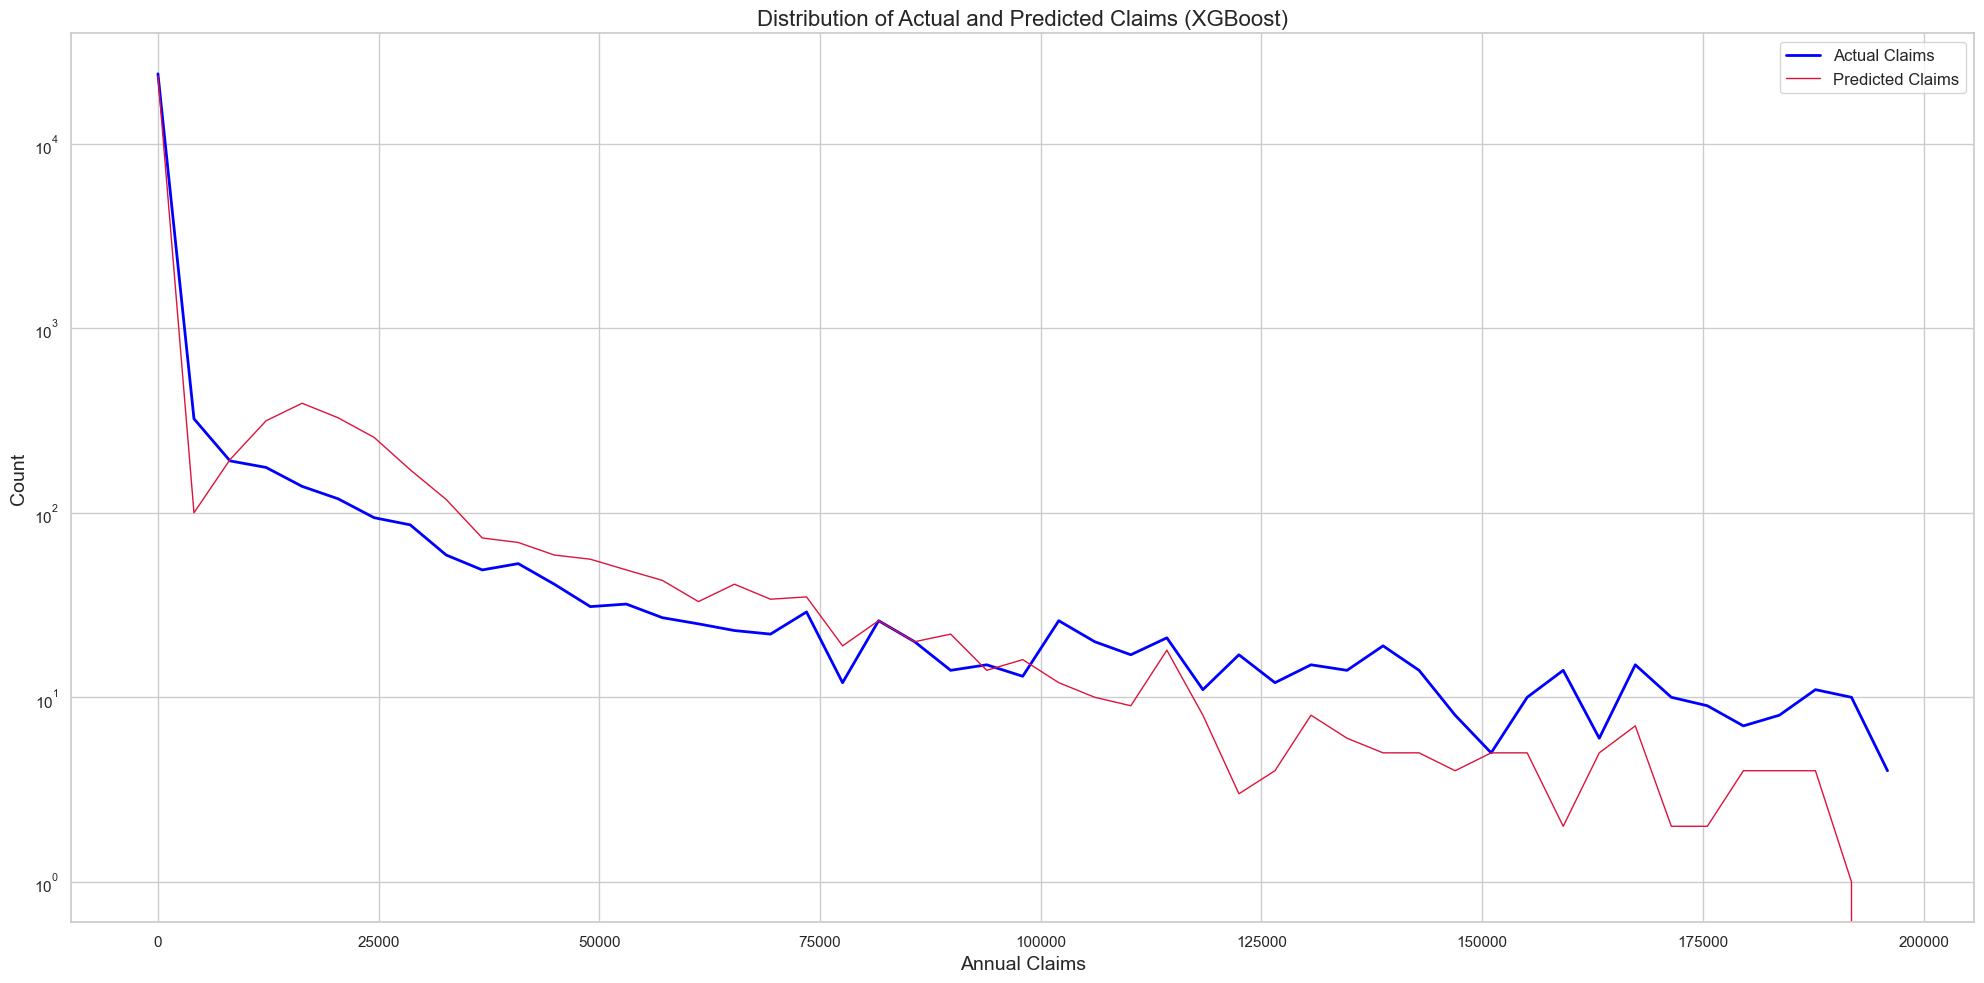

In [81]:
# Create figure with a single subplot
fig, ax = plt.subplots(figsize=(20, 10))

# Create bins for the histogram
bins = np.linspace(0, 200000, 50)

# Plot the actual and predicted values as line graphs
ax.plot(bins[:-1], np.histogram(y_test[y_test < 200000], bins=bins)[0], color='blue', linewidth=2, label='Actual Claims')
ax.plot(bins[:-1], np.histogram(xgboost_predictions[xgboost_predictions < 200000], bins=bins)[0], color='crimson', linewidth=1, label='Predicted Claims')

# Set the plot title and axis labels
ax.set_title('Distribution of Actual and Predicted Claims (XGBoost)', fontsize=16)
ax.set_xlabel('Annual Claims', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Add a legend to the plot
ax.legend(fontsize=12)

# Set log scale on the y-axis
ax.set_yscale('log')

# Remove unnecessary white space
plt.tight_layout()

# Display the plot
plt.show()


### Explainable Boosting Machines

In [82]:
# EBM
ebm_model = ExplainableBoostingRegressor()
ebm_model.fit(X_regression, y_regression, sample_weight=train_data['Exposure'])

#Make Predictions
ebm_predictions = ebm_model.predict(test_data.drop(['AnnualClaims'], axis=1))

#Calculate RMSE
ebm_rmse = mean_squared_error(test_data['AnnualClaims'], ebm_predictions, squared=False)
print("EBM RMSE:", ebm_rmse)

EBM RMSE: 16475.88264421234


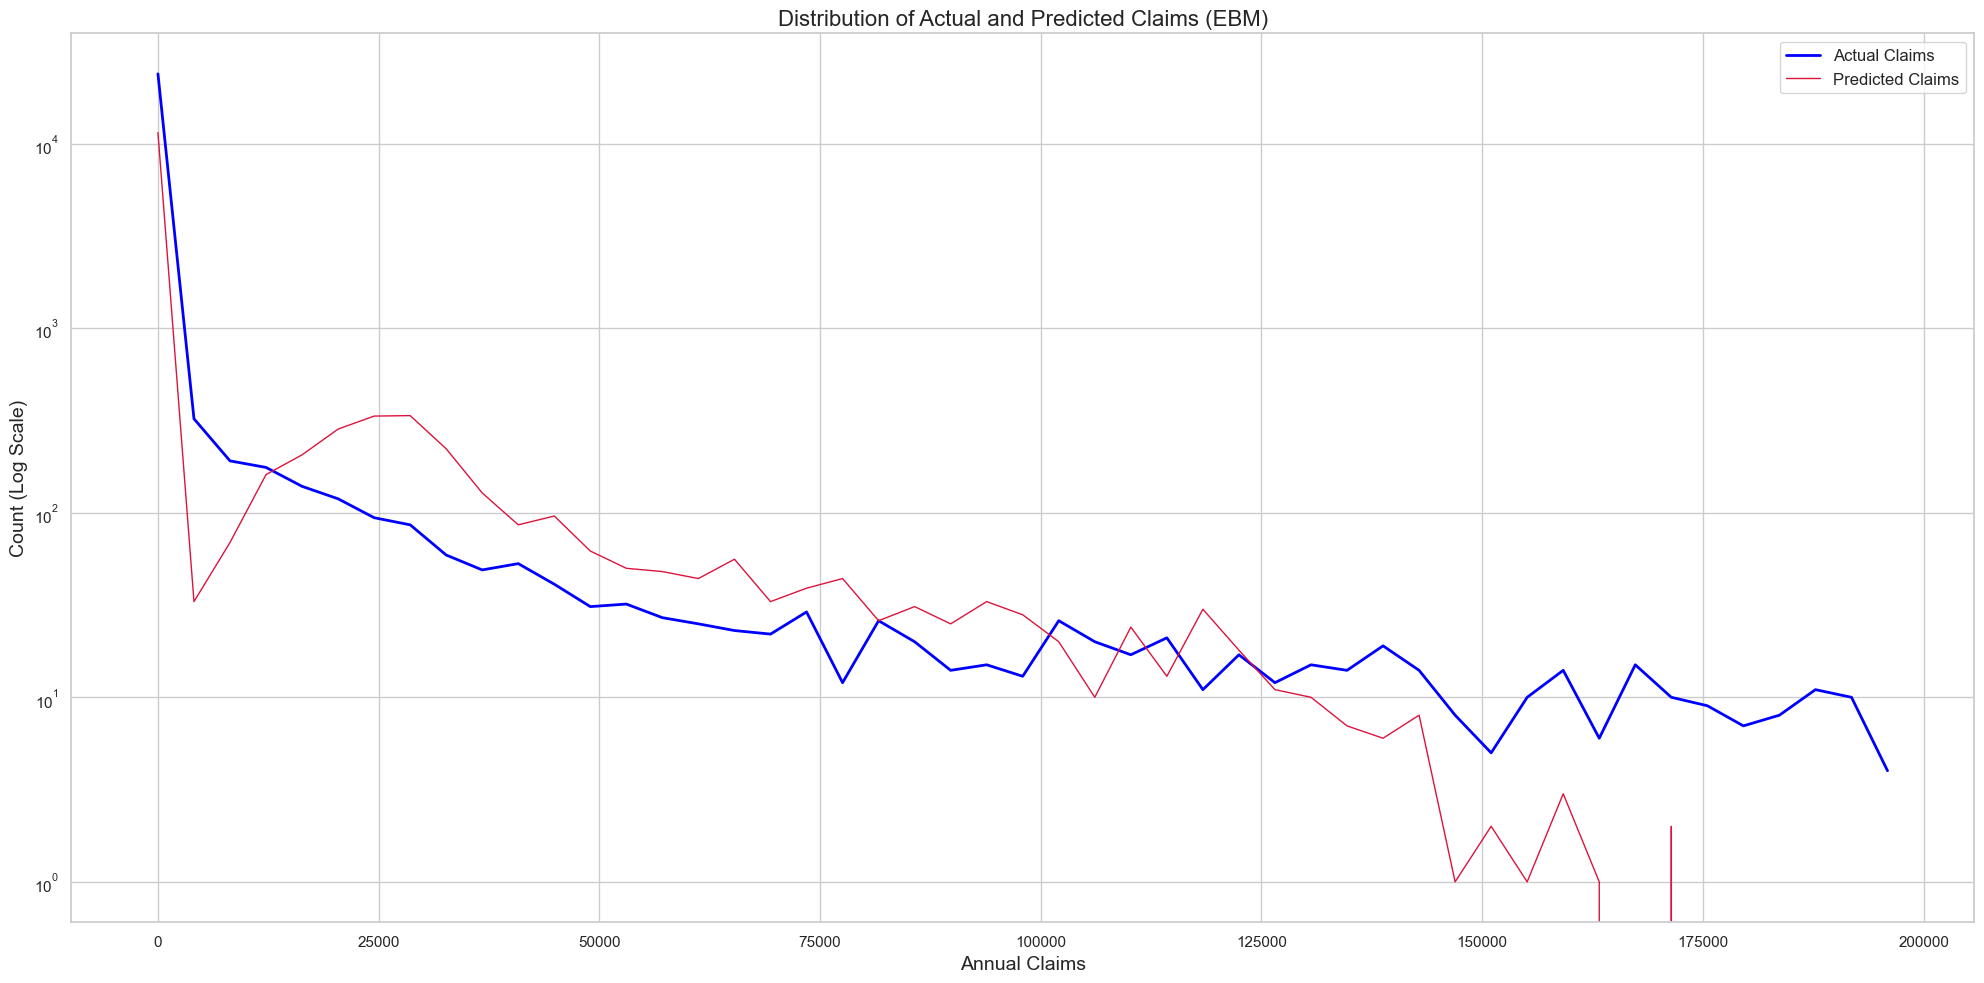

In [83]:
# Create figure with a single subplot
fig, ax = plt.subplots(figsize=(20, 10))

# Create bins for the histogram
bins = np.linspace(0, 200000, 50)

# Plot the actual and predicted values as line graphs
ax.plot(bins[:-1], np.histogram(y_test[y_test < 200000], bins=bins)[0], color='blue', linewidth=2, label='Actual Claims')
ax.plot(bins[:-1], np.histogram(ebm_predictions[ebm_predictions < 200000], bins=bins)[0], color='crimson', linewidth=1, label='Predicted Claims')

# Set the plot title and axis labels
ax.set_title('Distribution of Actual and Predicted Claims (EBM)', fontsize=16)
ax.set_xlabel('Annual Claims', fontsize=14)
ax.set_ylabel('Count (Log Scale)', fontsize=14)

# Add a legend to the plot
ax.legend(fontsize=12)

# Set log scale on the y-axis
ax.set_yscale('log')

# Remove unnecessary white space
plt.tight_layout()

# Display the plot
plt.show()


### LightGBM Regressor


In [84]:
# LightGBM
lightgbm_model = LGBMRegressor(objective='tweedie', tweedie_variance_power=1.6, metric='rmse', verbose=-1)
lightgbm_model.fit(X_regression, y_regression, sample_weight=train_data['Exposure'])

#Make Predictions
lightgbm_predictions = lightgbm_model.predict(test_data.drop(['AnnualClaims'], axis=1))

#Calculate RMSE
lightgbm_rmse = mean_squared_error(test_data['AnnualClaims'], lightgbm_predictions, squared=False)
print("LightGBM RMSE:", lightgbm_rmse)


LightGBM RMSE: 16451.559711261558


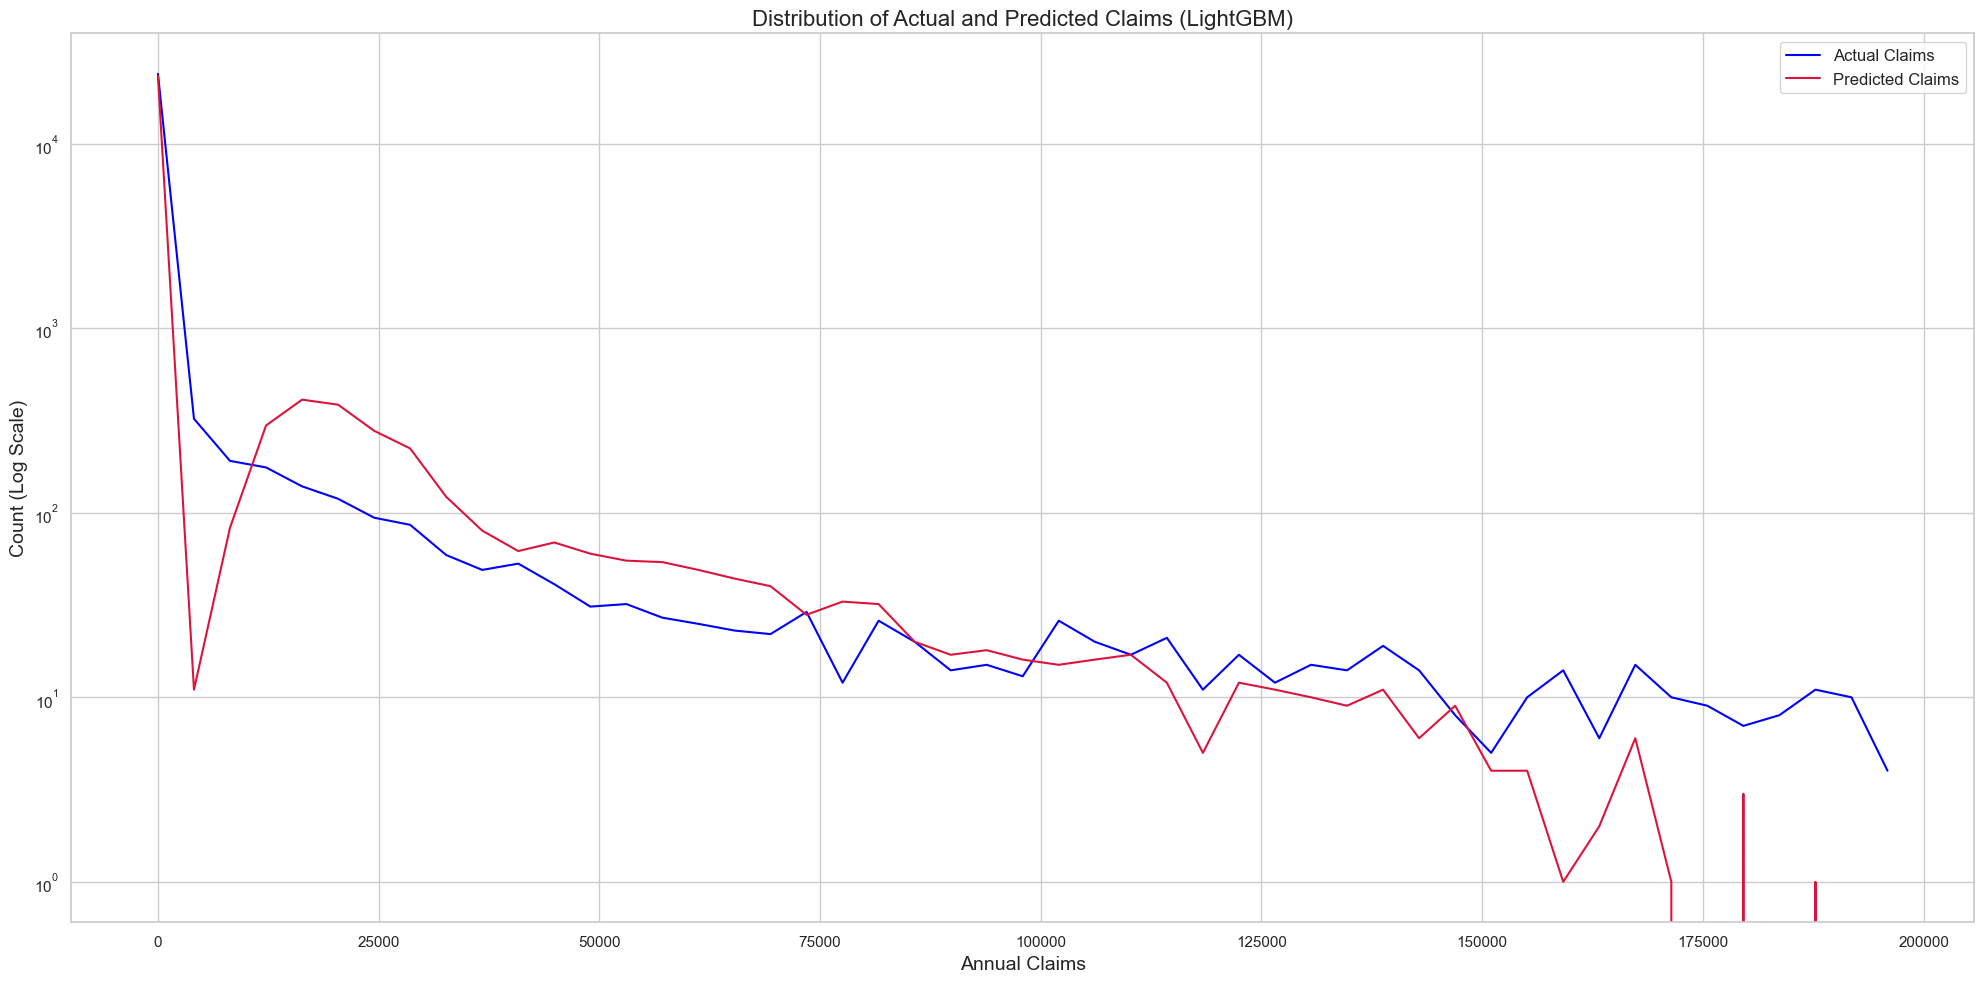

In [85]:
# Create figure with a single subplot
fig, ax = plt.subplots(figsize=(20, 10))

# Create bins for the histogram
bins = np.linspace(0, 200000, 50)

# Plot the actual and predicted values as line graphs
ax.plot(bins[:-1], np.histogram(y_test[y_test < 200000], bins=bins)[0], color='blue', label='Actual Claims')
ax.plot(bins[:-1], np.histogram(lightgbm_predictions[lightgbm_predictions < 200000], bins=bins)[0], color='crimson', label='Predicted Claims')

# Set the plot title and axis labels
ax.set_title('Distribution of Actual and Predicted Claims (LightGBM)', fontsize=16)
ax.set_xlabel('Annual Claims', fontsize=14)
ax.set_ylabel('Count (Log Scale)', fontsize=14)

# Add a legend to the plot
ax.legend(fontsize=12)

# Set log scale on the y-axis
ax.set_yscale('log')

# Remove unnecessary white space
plt.tight_layout()

# Display the plot
plt.show()


## Model Comparison

### Comparing the performance based on RMSE

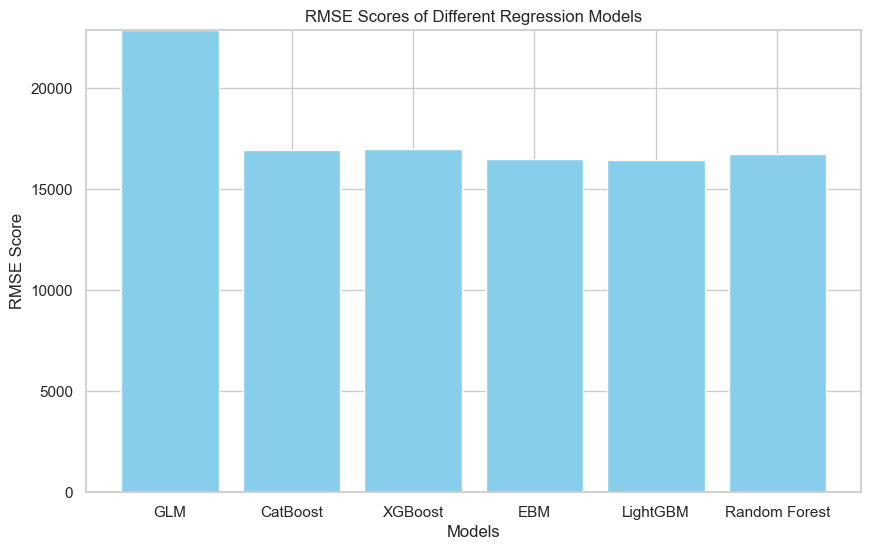

In [86]:
# RMSE scores for each model
models = ['GLM', 'CatBoost', 'XGBoost', 'EBM', 'LightGBM', 'Random Forest']
rmse_scores = [glm_rmse, catboost_rmse, xgboost_rmse, ebm_rmse, lightgbm_rmse, rf_rmse]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('RMSE Score')
plt.title('RMSE Scores of Different Regression Models')
plt.ylim(0, max(rmse_scores) + 1)  # Adjust the y-axis limits for better visualization
plt.show()


### Plot Comparing RMSE with the Standard Deviation of Annual Claims

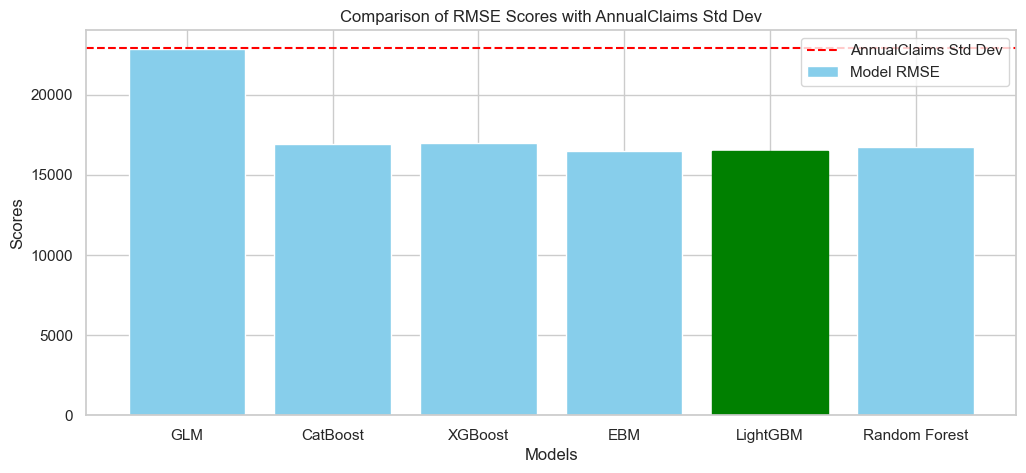

In [87]:
# RMSE scores for each model
models = ['GLM', 'CatBoost', 'XGBoost', 'EBM', 'LightGBM', 'Random Forest']
rmse_scores = [glm_rmse, catboost_rmse, xgboost_rmse, ebm_rmse, lightgbm_rmse, rf_rmse]

# Calculate the standard deviation of 'AnnualClaims'
annual_claims_std = df_clean['AnnualClaims'].std()

# Find the index of the model with the lowest RMSE
lowest_rmse_index = rmse_scores.index(min(rmse_scores))

# Plotting the bar chart
plt.figure(figsize=(12, 5))
bars = plt.bar(models, rmse_scores, color='skyblue', label='Model RMSE')

# Highlight the bar of the model with the lowest RMSE in a different color
bars[lowest_rmse_index].set_color('green')

plt.axhline(y=annual_claims_std, color='red', linestyle='--', label='AnnualClaims Std Dev')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of RMSE Scores with AnnualClaims Std Dev')
plt.legend()
plt.show()


### Insights

- In the evaluation of various regression models, the standard deviation of the target label 'AnnualClaims' was determined to be 22902.57.Notably, the root mean squared error (RMSE) scores obtained from the models closely clustered around this standard deviation.
- Specifically, the Generalized Linear Model (GLM) exhibited the highest RMSE of 22865.60, while the LightGBM model demonstrated the lowest RMSE at 16451.55.
- This observation indicates that the models' predictive performance, as measured by RMSE, aligns with the inherent variability captured in the 'AnnualClaims' feature.
- The relatively consistent RMSE values signify a balanced model performance across the evaluated algorithms, with LightGBM excelling in minimizing predictive errors compared to the other models.


### Proportion of Total Predicted Claims to Actual Claims on Unseen Dataset

In [88]:
# Function for for the preprocessing of data

def preprocessing (df):
    
    df_test_pmd = df.copy()
    
    # Create a new column 'Claimed' with 0 for 0.0 values and 1 for >0.0 values
    df_test_pmd['Claimed'] = df_test_pmd['AnnualClaims'].apply(lambda x: 0 if x == 0.0 else 1)
    
# Fill in the null values
    df_test_pmd['Occupation'].fillna(df_test_pmd['Occupation'].mode()[0], inplace=True)
    df_test_pmd['Area']=df_test_pmd['Area'].fillna(df_test_pmd['Area']).mode
    
# Initialize the BinaryEncoder
    encoder = ce.BinaryEncoder(cols=['Gender', 'Transmission', 'VehicleType'])

# Apply binary encoding to the categorical features
    df_test_pmd = encoder.fit_transform(df_test_pmd)

# Initialize the LabelEncoder
    encoder = LabelEncoder()

# List of categorical feature column names to label encode
    categorical_features = ['PolicyMainDriverAnnualMileage', 'PolicyMainDriverLicenseDurationRange']

# Apply label encoding to each feature
    for feature in categorical_features:
        df_test_pmd[f'{feature}_LabelEncoded'] = encoder.fit_transform(df_test_pmd[feature])

# Initialize the TargetEncoder
    encoder = ce.TargetEncoder(cols=['IndustryType', 'PersonProvince', 'MaritalStatus'])

# Apply target encoding to the categorical features
    df_test_pmd = encoder.fit_transform(df_test_pmd, df_test_pmd['AnnualClaims'])


# Create a dictionary to map each category to its frequency count
    make_counts = df_test_pmd['Make'].value_counts().to_dict()
    bodytype_counts = df_test_pmd['BodyType'].value_counts().to_dict()

# Apply frequency encoding to the categorical features
    df_test_pmd['Make_Frequency'] = df_test_pmd['Make'].map(make_counts)
    df_test_pmd['BodyType_Frequency'] = df_test_pmd['BodyType'].map(bodytype_counts)
    
    
# Drop categorical features
    df_test_pmd = df_test_pmd.drop(['index', 'Make','Occupation', 'Model', 'VehicleYear', 'Colour', 
                                    'Area', 'BodyType', 'PolicyMainDriverAnnualMileage', 'PolicyMainDriverLicenseDurationRange'], axis=1)
    

    return df_test_pmd

In [89]:
# the pmd test data
df_test = preprocessing(pmd_test)

In [90]:
# Make predictions using the test data

# Extract features and target variable
X_test = df_test.drop(['AnnualClaims'], axis=1)
y_test_actual = df_test['AnnualClaims']

# Use the trained LightGBM model to predict
lightgbm_test_pred = lightgbm_model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test_actual, lightgbm_test_pred, squared=False)
r2 = r2_score(y_test_actual, lightgbm_test_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 15500.91


### Plot Showing The Distribution of Actual Claims Vs Predicted Claims (Test Data)

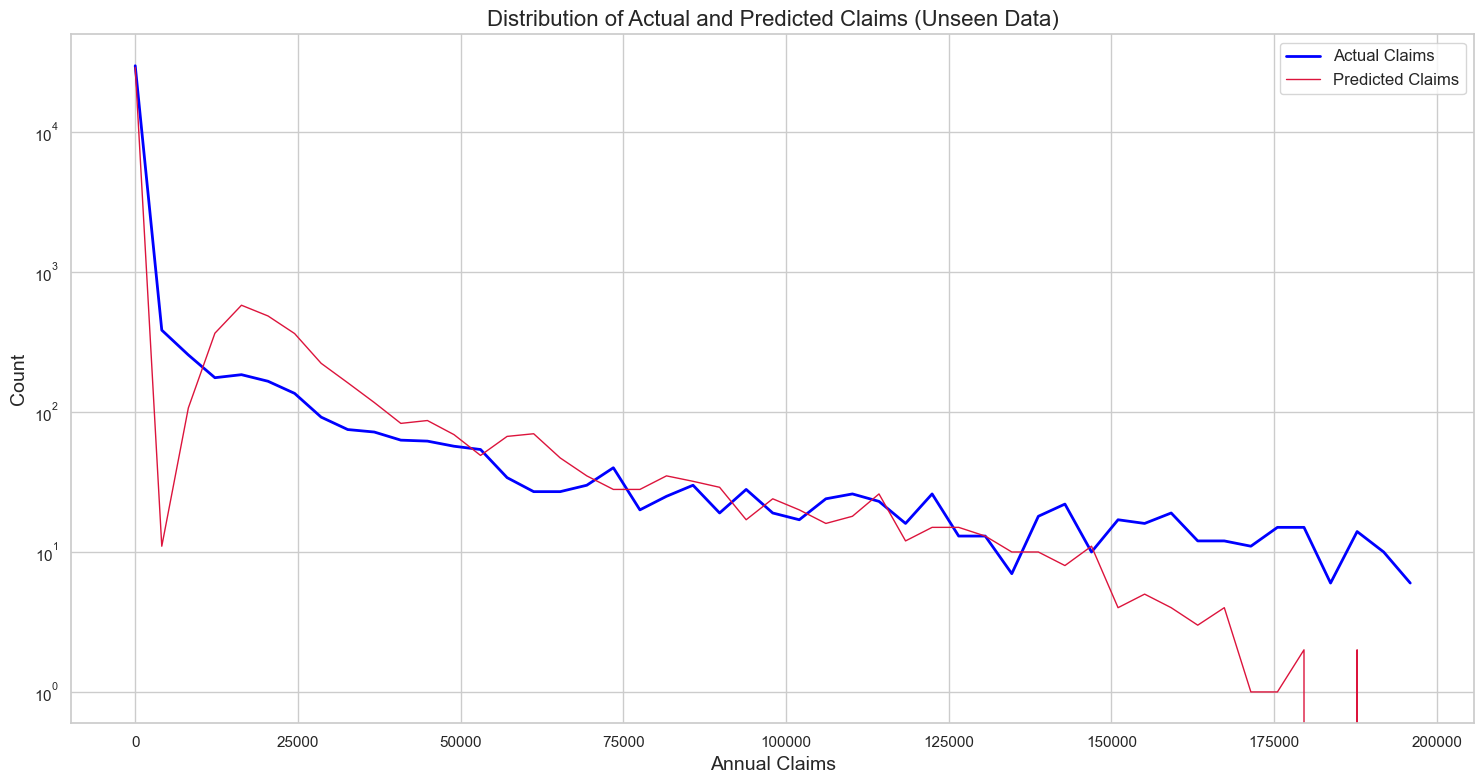

In [91]:
# Create figure with a single subplot
fig, ax = plt.subplots(figsize=(15, 8))

# Create bins for the histogram
bins = np.linspace(0, 200000,50)

# Plot the actual and predicted values as line graphs
ax.plot(bins[:-1], np.histogram(y_test_actual[y_test_actual < 200000], bins=bins)[0], color='blue', linewidth=2, label='Actual Claims')
ax.plot(bins[:-1], np.histogram(lightgbm_test_pred[lightgbm_test_pred < 200000], bins=bins)[0], color='crimson', linewidth=1, label='Predicted Claims')

# Set the plot title and axis labels
ax.set_title('Distribution of Actual and Predicted Claims (Unseen Data)', fontsize=16)
ax.set_xlabel('Annual Claims', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Add a legend to the plot
ax.legend(fontsize=12)

# Set log scale on the y-axis
ax.set_yscale('log')

# Set the minimum y-value to 0
ax.set_ylim(bottom=0)

# Remove unnecessary white space
plt.tight_layout()

# Display the plot
plt.show()


- The analysis of the chart reveals that the LightGBM model exhibits a close resemblance between the actual and predicted claims distributions. This indicates that the model effectively captures the underlying patterns in the data and can accurately predict claims values.

- However, a slight overprediction of high-value claims is observed. This is a common challenge in insurance claim prediction, as high-value claims are typically less frequent in the training data compared to low-value claims.

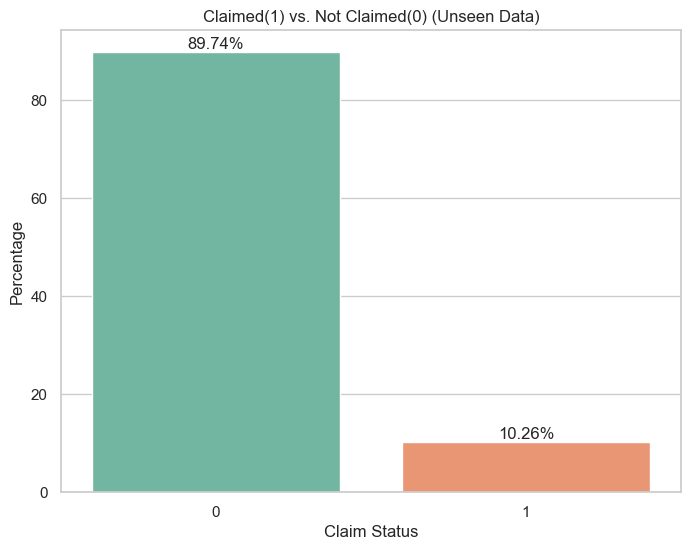

In [92]:
percentage_counts = df_test['Claimed'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=percentage_counts.index, y=percentage_counts.values, palette='Set2')
plt.title('Claimed(1) vs. Not Claimed(0) (Unseen Data)')
plt.xlabel('Claim Status')
plt.ylabel('Percentage')

# Annotate the percentages on the bars
for p, percentage in zip(ax.patches, percentage_counts.values):
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

### Insights

- This plot indicates a very high proportion of people who made claims relative to those who didn't.

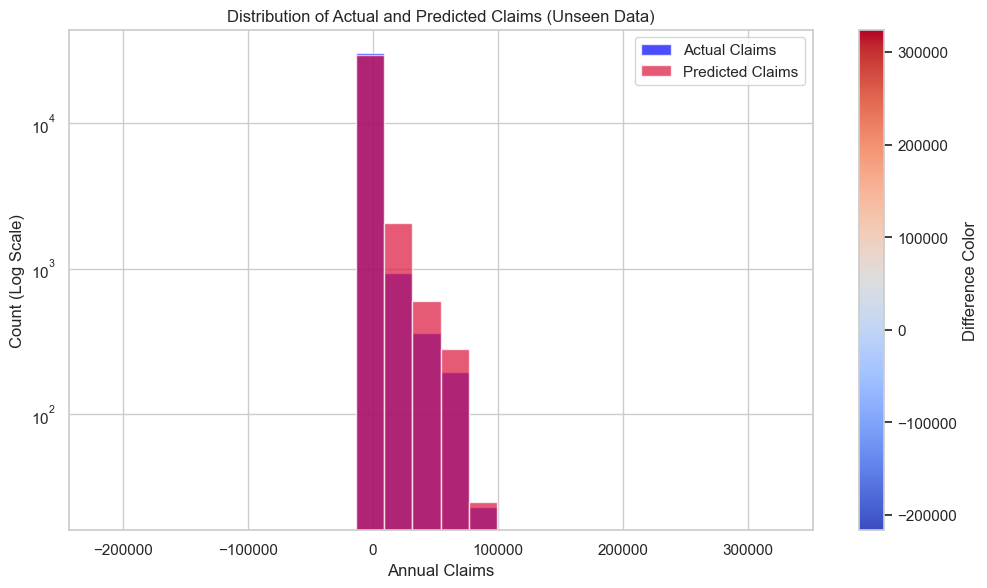

In [93]:
import seaborn as sns

# differences is a pandas Series or NumPy array
differences = y_test_actual - lightgbm_test_pred

# Create a diverging bar chart using color to represent the direction of difference
plt.figure(figsize=(12, 6.5))

# Create bins for the histogram
bins = np.linspace(min(differences), max(differences), 25)

# Plot the actual and predicted values as histograms
actual_hist, _, _ = plt.hist(y_test_actual[y_test_actual < 80000], bins=bins, color='blue', alpha=0.7, label='Actual Claims')
pred_hist, _, _ = plt.hist(lightgbm_test_pred[lightgbm_test_pred < 80000], bins=bins, color='crimson', alpha=0.7, label='Predicted Claims')

# Set the y-axis to a log scale
plt.yscale('log')

# Set the plot title and axis labels
plt.title('Distribution of Actual and Predicted Claims (Unseen Data)')
plt.xlabel('Annual Claims')
plt.ylabel('Count (Log Scale)')

# Create a diverging colorbar for the bar plot using the differences
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(min(differences), max(differences)), cmap="coolwarm"))
cbar.set_label('Difference Color')

# Display the plot
plt.legend()
plt.show()

### Insights


- This plot shows that the model did fairly well in predicting the target variable, considering the test data had about 89% 0 claims, hence why the bar at point 0 is tall, but could be an indication of overfitting. However the model still did well at predicting the non zero claims, indicated by the shorter bars with warm colours. 

# Recommendations

### Regression

Based on the results we got, the Light Gradient-Boosting Machines algorithm seems to be the best at predicting Insurance Claims. However, there is still much room for improvement of the model(s) by implementing the following:

- Conducting a thorough analysis of residuals to understand where the model(s) may struggle. Insights from residual analysis can guide adjustments to the model or data preprocessing steps.

- Establishing a framework for continuous improvement, incorporating feedback loops to adapt the model(s) as new data becomes available. This ensures the model(s) remains effective in dynamic environments.

### Classification


The Random Forest classifier exhibits a high level of accuracy and robustness, making it a valuable tool for predicting insurance claims. Its ability to effectively distinguish between claim and non-claim instances positions it as a strong candidate for deployment in real-world scenarios.

The classification report instills confidence in the Random Forest model's capability to contribute meaningfully to decision-making processes related to insurance claims, providing a solid foundation for further exploration and application.